In [1]:
# Loading required packages
library(plyr)
library(dplyr)
library(reshape)
library(ggplot2)
library(phyloseq)
#library(vegan)
#library(biomformat)
#library(ggdendro)
#library(DESeq2)
#library(dada2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘reshape’

The following object is masked from ‘package:dplyr’:

    rename

The following objects are masked from ‘package:plyr’:

    rename, round_any



In [2]:
OTUtab = t(readRDS("CHTC/Dada2_Results_OA20_PEAR/OTUtab.nochim.rds"))
OTUtab = otu_table(OTUtab, taxa_are_rows=TRUE)
#write.table(OTUtab,file="CHTC/Dada2_Results/OTUtab.txt", quote=FALSE,sep="\t",col.names=TRUE,row.names=TRUE)

In [3]:
# Get the number of OTUs
numbers = rep(1:length(row.names(OTUtab)))
# Set up for loop to append "sq" and the number
newOTUnames=numbers
for (i in numbers) {
    newOTUnames[i]=paste("sq",i,sep="")
}
# Replace the OTU table names with these new names
row.names(OTUtab) = newOTUnames

In [4]:
samdat = sample_data(read.csv("../../data/Soils_data/WBNPNWT_Soils_2015_Metadata_File_ITS.txt",sep="\t",row.names=1))
# Pulling in the sample data

In [5]:
TaxTab = read.table("CHTC/Dada2_Results_OA20_PEAR/taxonomy/DADA2_seqs_ITSx.fasta.ITS2_tax_assignments.txt",sep="\t", fill=TRUE)
# Gets the taxonomy table separated into the name+size, taxonomy, and two scores.

V1split = read.table(textConnection(as.character(TaxTab$V1)), sep=";",fill=TRUE, header=FALSE)
# Split out the otu ID and count

V2split = read.table(textConnection(as.character(TaxTab$V2)), sep=";",fill=TRUE, header=FALSE)
V2splitnew=rbind(t(parse_taxonomy_greengenes(as.vector(unlist(V2split[1,])))))
for (i in 2:dim(V2split)[1]){
    V2splitnew=rbind(V2splitnew,t(parse_taxonomy_greengenes(as.vector(unlist(V2split[i,])))))
}
# Split out the taxonomy and read it as greengenes

V3split = TaxTab[,3:4]
# Pull out the match ratings

TaxTab[,1:2] = V1split
TaxTab[,3:9] = V2splitnew
TaxTab[,10:11] = V3split
colnames(TaxTab) = c("OTU","Size","Kingdom","Phylum","Class","Order","Family","Genus","Species","Qscore1","Qscore2")
TaxTabPs = TaxTab[,c(1,3:9)]
TaxTabPs = as.matrix(TaxTabPs)
row.names(TaxTabPs) = TaxTabPs[,1]
TaxTabPs = TaxTabPs[,2:8]
#TaxTabPs = tax_table(TaxTabPs)
# Putting it all together

Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[1, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonom

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in `[<-.data.frame`(`*tmp*`, , 1:2, value = structure(list(V1 = structure(c(2217L, :
“provided 3 variables to replace 2 variables”

In [6]:
## Bringing in the ITSx identities file, keeping only those that were ITS2 and UNITE-IDd

TaxToKeep = read.table("CHTC/Dada2_Results_OA20_PEAR/DADA2_seqs_ITSx.fasta.extraction.results",sep="\t", fill=TRUE)
# Gets the ITSx full results file and separates out otu+count, kingdom, otehr properties
V1split = read.table(textConnection(as.character(TaxToKeep$V1)), sep=";",fill=TRUE, header=FALSE)
# Split out the otu ID and count
TaxToKeep = data.frame(OTU=V1split$V1,Count=V1split$V2,KingdomID=TaxToKeep$V3)
# Put them back as a table
TaxToKeep$KingdomID = mapvalues(TaxToKeep$KingdomID, from = levels(TaxToKeep$KingdomID), 
                                to = c("Bryophyta","Amoebozoa","Fungi","Chlorophyta",
                                       "Rhodophyta", "Marchantiophyta","Metazoa",
                                       "Raphidophyceae","Rhizaria","Synurophyceae",
                                       "Tracheophyta"))

inFunc = function(x, table) match(x, table, nomatch = 0) > 0
# Weirdly, %in% stopped working. This redefines it.

# Give the right names
TaxToKeep = TaxToKeep[TaxToKeep$OTU %in% row.names(TaxTabPs),]
# Because a few samples made it through the ITSx but not through the UNITE database?

In [7]:
TaxTabPs = data.frame(TaxTabPs)
for (i in 1:dim(TaxTabPs)[1]){
    if(TaxTabPs$Kingdom[i] == "Unassigned"){
        TaxTabPs$KingdomFixed[i] = paste(TaxToKeep$KingdomID[TaxToKeep$OTU==row.names(TaxTabPs[i,])])
    }
    else{TaxTabPs$KingdomFixed[i]=""}
}
TaxTabPs$Kingdom=TaxTabPs$KingdomFixed
TaxTabPs = TaxTabPs[,1:7]
TaxTabPs = tax_table(as.matrix(TaxTabPs))

In [8]:
ps = phyloseq(OTUtab,samdat,TaxTabPs)
ps = subset_taxa(ps, Kingdom!="Tracheophyta")
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5629 taxa and 214 samples ]
sample_data() Sample Data:       [ 214 samples by 75 sample variables ]
tax_table()   Taxonomy Table:    [ 5629 taxa by 7 taxonomic ranks ]

In [9]:
sample_names(ps)=sample_data(ps)$Correct_ID
# Fixing the ID issue from the Biotech centre

ps.merged = merge_samples(ps, "Sample_ID")
# Merging the in-lab DNA extraction samples
# This sums the OTUs for each sample ID, and averages the sample data
# That's an issue for the non-numeric sample data, so we have to add it back in.
# The code below is probably inefficient, but it works correctly.

names=colnames(sample_data(ps))
notcommonnames = c('Sample_Name','Replicate','Project_ID','Fwd_Primer_Barcode','Rev_Primer_Barcode','Revcomp_Rev_Primer_Barcode')
commonnames = names[(names %in% notcommonnames)]
common_sample_data = sample_data(ps)[ , -which(names(sample_data(ps)) %in% commonnames)]
commonrownames=row.names(sample_data(ps.merged))
common_sample_data2 = common_sample_data[which(common_sample_data$Sample_ID %in% commonrownames),]
common_sample_data2 = common_sample_data2[!duplicated(common_sample_data2$Sample_ID), ]
row.names(common_sample_data2) = common_sample_data2$Sample_ID
sample_data(ps.merged)=common_sample_data2

# Renaming it all
ps=ps.merged

sample_data(ps)$TotalSeqs=sample_sums(ps)
# Adding sample sums
sample_data(ps)[as.numeric(sample_data(ps)$pH)==0 & !is.na(as.numeric(sample_data(ps)$pH)),65]=NA
# Fixing pH 0's
sample_data(ps)[sample_data(ps)$Interval=="No Trees" & !is.na(sample_data(ps)$pH),23]=NA

In [10]:
# Importing the dataset
FactorTable = read.csv("../../data/Soils_data/SamDat.txt",sep="\t",header=TRUE)
# Importing a dataframe with all the factors and whether or not they should be numeric
# And what set of data they belong to

FactorTable = FactorTable[(FactorTable$Factors %in% colnames(sample_data(ps))),]

In [11]:
for (i in colnames(sample_data(ps))[colnames(sample_data(ps)) %in%  FactorTable$Factors ]) {
        if(FactorTable$Class[FactorTable$Factors==i]=="num"){
            sample_data(ps)[,i] = as.numeric(paste(data.frame(sample_data(ps.merged)[,i])[,1]))
        }
    }
# No real need to do this for full ps, as won't really be doing stats on raw data

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, e

### Can start here with phyloseq file

In [2]:
ps = readRDS(file="CHTC/Dada2_Results_OA20_PEAR/ps.fungi")

In [3]:
cutoff = 500
ps = prune_samples(sample_sums(ps)>=cutoff, ps)
# This results in no blanks remaining.

In [4]:
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5670 taxa and 100 samples ]
sample_data() Sample Data:       [ 100 samples by 102 sample variables ]
tax_table()   Taxonomy Table:    [ 5670 taxa by 18 taxonomic ranks ]

In [5]:
ps.norm = transform_sample_counts(ps, function(x) x/sum(x))

## Looking for l2fc as related to burn severity

Do we want to do this separately for different treatments? Initially, running it on the full dataset.

In [6]:
library(metagenomeSeq)
library(biomformat)
library(interactiveDisplay)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, un

In [7]:
ps.biom = ps
# Copy phyloseq object
biom = make_biom(data = t(otu_table(ps.biom)), observation_metadata= tax_table(ps.biom), sample_metadata = sample_data(ps.biom))
# turn phyloseq into a biom table with OTU table, taxonomy, and sample data
biom.MRexp = biom2MRexperiment(biom)
# turns our biom file into the type of file needed for this analysis (an MRexperiment object)
biom.MRexp = biom.MRexp[,-which(is.na(pData(biom.MRexp)$pH))]
biom.MRexp

Warning message in class(X) <- NULL:
“Setting class(x) to NULL;   result will no longer be an S4 object”

MRexperiment (storageMode: environment)
assayData: 5670 features, 93 samples 
  element names: counts 
protocolData: none
phenoData
  sampleNames: 15S-NT-19O 15S-NT-21O ... 15S-WB-U05O (93 total)
  varLabels: Barcodes Sample_ID ... Surface_Severity_Class (102 total)
  varMetadata: labelDescription
featureData
  featureNames: sq1 sq2 ... sq6023 (5670 total)
  fvarLabels: Kingdom Phylum ... Citation.Source (18 total)
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [16]:
#head(normFactors(biom.MRexp))
# Initially has no normalization factors.

In [17]:
#head(libSize(biom.MRexp))
# Number of sequences per sample

In [18]:
# cumNormStat(biom.MRexp) == cumNormStatFast(biom.MRexp)
# These approaches are the same
# p = cumNormStat(biom.MRexp)
# Can set p - default value is 0.5

In [20]:
biom.MRexp.norm = cumNorm(biom.MRexp, cumNormStat(biom.MRexp, qFlag=TRUE, pFlag = FALSE))
# Normalizing the counts based on the quantile decided above. (default)
head(normFactors(biom.MRexp.norm))
# Now normalization factors do exist.
# Lib size stays the same.

Default value being used.


15S-NT-19O 15S-NT-20O 15S-NT-21M 15S-NT-21O 15S-NT-22M 15S-NT-22O 
       455        242        244        196        461        152

In [21]:
ModelData = pData(biom.MRexp.norm)
ModelData$Understory_CBI = as.numeric(ModelData$Understory_CBI)
ModelData$pH = as.numeric(ModelData$pH)
# Making sure all numers are actually read as numeric, and renaming factors with spaces.

model = model.matrix(~pH+Veg_Comm+Severity_Class, data=ModelData)
# Creating the model that we will use to analyze our data.

In [22]:
head(model)

(Intercept) pH   Severity_ClassLow Severity_ClassModerate
15S-NT-19O 1           7.62 0                 1                     
15S-NT-21O 1           7.30 1                 0                     
15S-NT-22M 1           6.66 0                 1                     
15S-NT-22O 1           6.27 0                 1                     
15S-NT-23M 1           5.80 1                 0                     
15S-NT-23O 1           6.69 1                 0                     
           Severity_ClassUnburned
15S-NT-19O 0                     
15S-NT-21O 0                     
15S-NT-22M 0                     
15S-NT-22O 0                     
15S-NT-23M 0                     
15S-NT-23O 0

In [26]:
settings = zigControl(tol = 1e-04, maxit = 100, verbose = TRUE, dfMethod = "default", pvalMethod = "default")

#tol: The tolerance for the difference in negative log likelihood estimates for a feature to remain active.
    # Initially 1e-04
#maxit: The maximum number of iterations for the expectation-maximization algorithm.
#verbose: Whether to display iterative step summary statistics or not.
#dfMethod: Either 'default' or 'modified' (by responsibilities).
#pvalMethod: Either 'default' or 'bootstrap'.

# When we run the fit, we can see how many iterations were needed, and adjust accordingly

In [27]:
fit = fitZig(obj=biom.MRexp.norm, mod=model, control = settings, useCSSoffset = TRUE, zeroMod = NULL, useMixedModel = FALSE)
# Running the differential abundance fit
# May want to use fitFeatureModel instead - 
# uses a zero-inflated lognormal instead of z-i Gaussian model
# https://support.bioconductor.org/p/94138/
# useCSSoffset is for including the default scaling parameters in the model
# Mixed model is for if there's duplicate features (shouldn't be?)

it= 0, nll=132.65, log10(eps+1)=Inf, stillActive=5629
it= 1, nll=128.81, log10(eps+1)=Inf, stillActive=4665
it= 2, nll=122.69, log10(eps+1)=Inf, stillActive=3937
it= 3, nll=122.24, log10(eps+1)=Inf, stillActive=2491
it= 4, nll=122.63, log10(eps+1)=Inf, stillActive=1604
it= 5, nll=123.13, log10(eps+1)=Inf, stillActive=926
it= 6, nll=124.18, log10(eps+1)=Inf, stillActive=504
it= 7, nll=124.41, log10(eps+1)=Inf, stillActive=342
it= 8, nll=125.01, log10(eps+1)=Inf, stillActive=211
it= 9, nll=125.25, log10(eps+1)=Inf, stillActive=161
it=10, nll=125.32, log10(eps+1)=Inf, stillActive=148
it=11, nll=125.33, log10(eps+1)=Inf, stillActive=145
it=12, nll=125.34, log10(eps+1)=Inf, stillActive=142
it=13, nll=125.35, log10(eps+1)=Inf, stillActive=140
it=14, nll=125.36, log10(eps+1)=Inf, stillActive=140
it=15, nll=125.36, log10(eps+1)=Inf, stillActive=140
it=16, nll=125.37, log10(eps+1)=Inf, stillActive=140
it=17, nll=125.37, log10(eps+1)=Inf, stillActive=140
it=18, nll=125.37, log10(eps+1)=Inf, stil

In [28]:
EffSamp = calculateEffectiveSamples(fit)
MeanEffSamp = mean(EffSamp[!is.na(EffSamp)])
MeanEffSamp
# Calculates the effective sample size - requires the first fit

[1] 21.02508

In [29]:
rareFeatures = which(rowSums(MRcounts(biom.MRexp.norm) > 0) < MeanEffSamp)
# These are the taxa that that had less than the average number of effective samples
# As recommended in the vignette: https://www.bioconductor.org/packages/devel/bioc/vignettes/metagenomeSeq/inst/doc/metagenomeSeq.pdf

biom.MRexp.norm.noRare = biom.MRexp.norm[-rareFeatures, ]
# Remove rare features
biom.MRexp.norm.noRare = cumNorm(biom.MRexp.norm.noRare, cumNormStat(biom.MRexp.norm.noRare, qFlag=TRUE, pFlag = FALSE))
# Re-run cumNorm

ModelData = pData(biom.MRexp.norm.noRare)
ModelData$Understory_CBI = as.numeric(ModelData$Understory_CBI)
ModelData$pH = as.numeric(ModelData$pH)
# Re-set model data again

model = model.matrix(~pH+Severity_Class, data=ModelData)
# Resetting same model

Default value being used.


In [30]:
levels(as.factor(ModelData$Severity_Class))

[1] "High"     "Low"      "Moderate" "Unburned"

In [31]:
fit = fitZig(obj=biom.MRexp.norm.noRare, mod=model, control = settings, useCSSoffset = TRUE, zeroMod = NULL, useMixedModel = FALSE)
# Running the differential abundance fit
# May want to use fitFeatureModel instead - 
# uses a zero-inflated lognormal instead of z-i Gaussian model
# https://support.bioconductor.org/p/94138/
# useCSSoffset is for including the default scaling parameters in the model
# Mixed model is for if there's duplicate features (shouldn't be?)

it= 0, nll=148.87, log10(eps+1)=Inf, stillActive=317
it= 1, nll=162.59, log10(eps+1)=0.02, stillActive=16
it= 2, nll=162.82, log10(eps+1)=0.01, stillActive=3
it= 3, nll=162.94, log10(eps+1)=0.00, stillActive=1
it= 4, nll=163.01, log10(eps+1)=0.00, stillActive=1
it= 5, nll=163.07, log10(eps+1)=0.00, stillActive=0


In [32]:
modeldesign = fit$fit$design
modelfit = fit$fit
# These are like limma objects, so we need to learn how to analyze limma fits

In [34]:
?treat

In [35]:
modelfit.treat = treat(modelfit, lfc=1)
# can adjust lfc parameter to look for relationships between parameter and l2FC
# Can set it at whatever is "meaningful"
# This could help pull out particularly strong responders.

In [36]:
resultspH=topTreat(modelfit.treat, coef=2, number=7500)
resultsSeverity_Class=topTreat(modelfit.treat, coef=3, number=7500)

# adjusted p values are adjusted using BH correction. Basically correspond to FDR, not regular p values.
# see p.adjust for more details.

In [39]:
head(modeldesign)
# Need to make sure you pull out the right factors - esp. with categorical.

(Intercept) pH   Severity_ClassLow Severity_ClassModerate
15S-NT-19O 1           7.62 0                 1                     
15S-NT-21O 1           7.30 1                 0                     
15S-NT-22M 1           6.66 0                 1                     
15S-NT-22O 1           6.27 0                 1                     
15S-NT-23M 1           5.80 1                 0                     
15S-NT-23O 1           6.69 1                 0                     
           Severity_ClassUnburned scalingFactor
15S-NT-19O 0                      0.3895668    
15S-NT-21O 0                      0.0881416    
15S-NT-22M 0                      0.3939653    
15S-NT-22O 0                      0.1686420    
15S-NT-23M 0                      0.2103889    
15S-NT-23O 0                      0.2654369

In [40]:
topTreat(modelfit.treat, coef=3, number=10)
# For example, this give logFC for low Severity_Class (vs. HIgh was the default - need to organize factors)

logFC     AveExpr   t         P.Value      adj.P.Val   
sq7    7.626679 1.6434055  5.870989 3.216418e-08 1.019604e-05
sq181  3.542283 1.2079449  4.895403 2.021356e-06 3.203849e-04
sq82   3.775530 2.1432268  4.707374 4.297135e-06 4.540639e-04
sq62  -3.910878 2.4405575 -4.026682 5.714934e-05 4.529085e-03
sq175  3.322236 1.2783663  3.833634 1.138570e-04 7.218535e-03
sq16  -3.352970 0.9532234 -3.729513 1.636727e-04 8.647374e-03
sq209 -3.216261 0.9985975 -3.487446 3.711896e-04 1.680958e-02
sq353  2.592429 0.6576893  3.415405 4.703514e-04 1.863767e-02
sq172  3.390782 0.8751799  3.303942 6.741157e-04 2.374385e-02
sq29   3.754073 1.1218711  3.257548 7.813056e-04 2.476739e-02

In [41]:
# Want to get significant taxa from resultspH and results CBI
results=merge(resultspH,resultsSeverity_Class,by=0, all=TRUE, suffixes=c(".pH",".Severity"))
row.names(results)=results$Row.names
results= merge(results,fData(biom.MRexp),by=0,all=TRUE)
results = results[,3:dim(results)[2]]
results$sigpH = ifelse(results$adj.P.Val.pH<0.05,1,0.5)
results$sigSeverity = ifelse(results$adj.P.Val.Severity<0.05,1,0.5)

Warning message in merge.data.frame(results, fData(biom.MRexp), by = 0, all = TRUE):
“column name ‘Row.names’ is duplicated in the result”

In [42]:
head(results)

logFC.pH    AveExpr.pH t.pH      P.Value.pH adj.P.Val.pH logFC.Severity
1 -0.04894792 7.9299052   0.000000 0.99999463  1            0.02380328   
2  0.39976481 3.9033897   0.000000 0.99820814  1           -3.35837984   
3 -1.60774817 1.5115865  -2.363159 0.01008588  1           -0.10719527   
4          NA        NA         NA         NA NA                    NA   
5 -0.31623352 0.5695874   0.000000 1.00000000  1            1.11546562   
6          NA        NA         NA         NA NA                    NA   
  AveExpr.Severity t.Severity P.Value.Severity adj.P.Val.Severity Kingdom
1 7.9299052         0.000000  0.988886871      0.9996848                 
2 3.9033897        -2.707217  0.004028716      0.0851402                 
3 1.5115865         0.000000  0.953173196      0.9996848                 
4        NA               NA           NA             NA                 
5 0.5695874         0.317424  0.375811679      0.9996848                 
6        NA               NA           NA             NA                 
  Phylum        Class           Order                            
1 Ascomycota    Eurotiomycetes  Eurotiales                       
2 Ascomycota    Eurotiomycetes  Eurotiales                       
3 Ascomycota    Leotiomycetes   Leotiomycetes_ord_Incertae_sedis 
4 Basidiomycota Pucciniomycetes unidentified                     
5 Ascomycota    Leotiomycetes   unidentified                     
6 Ascomycota    Eurotiomycetes  Eurotiomycetes_ord_Incertae_sedis
  Family                            Genus        Species      sigpH sigSeverity
1 Trichocomaceae                    Penicillium               0.5   0.5        
2 Trichocomaceae                    Penicillium               0.5   0.5        
3 Myxotrichaceae                    Oidiodendron              0.5   0.5        
4 unidentified                      unidentified unidentified  NA    NA        
5 unidentified                      unidentified unidentified 0.5   0.5        
6 Eurotiomycetes_fam_Incertae_sedis Calyptrozyma unidentified  NA    NA

Warning message:
“Removed 5312 rows containing missing values (geom_point).”

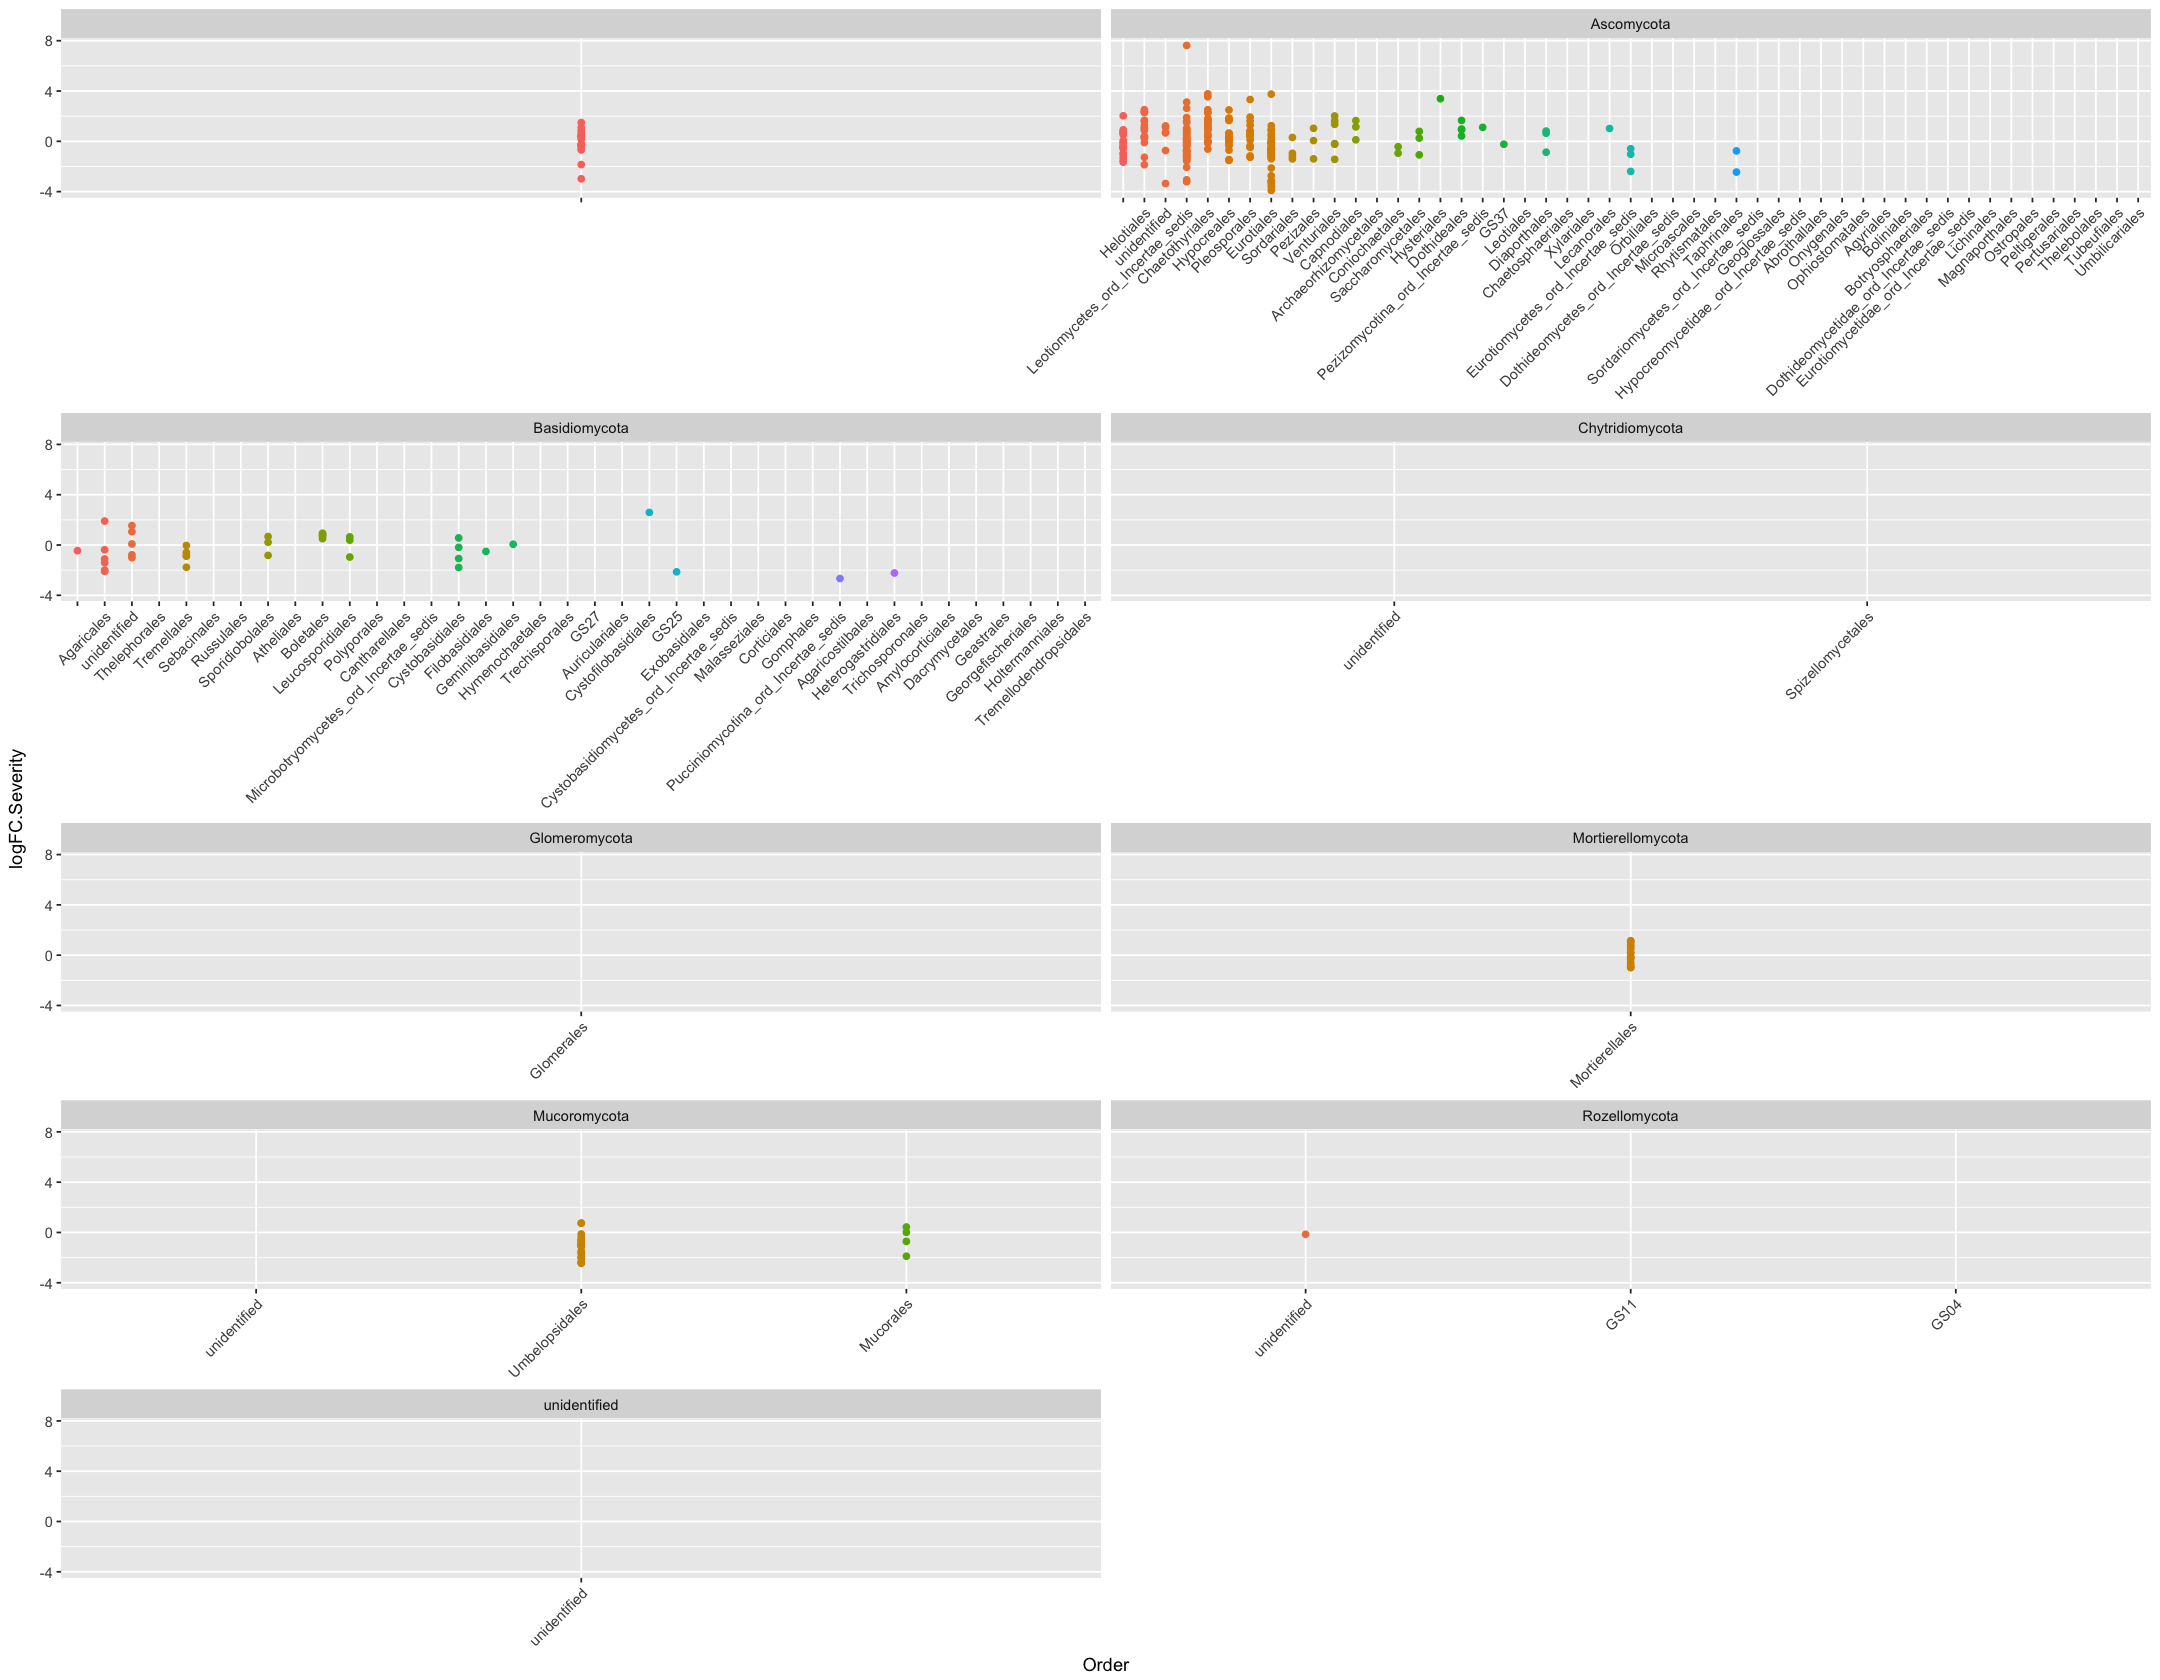

In [43]:
options(repr.plot.width=18, repr.plot.height=14)


# Ordering factor by most abundant phyla
TaxOrder = results%>%
    group_by(Order)%>%
    summarize(TotalOTUs=n())%>%
    arrange(-TotalOTUs)
TaxOrder = TaxOrder$Order
results$Order = ordered(results$Order, levels=TaxOrder)
results$sigSeverity = as.numeric(results$sigSeverity)

p = ggplot(results,aes(Order, logFC.Severity, colour=Order))
p = p + geom_point()
p = p + scale_alpha(aes(alpha=sigSeverity))
p = p + theme(axis.text.x = element_text(angle=45, hjust=1))
p = p + facet_wrap(~Phylum, ncol=2, scales="free_x")
p = p + guides(colour=FALSE)
p
# Would be interesting to run this analysis for each veg comm separately, plot OTUs against each other
# like in my ISME paper...
# Actually would be cool to see Org vs Min soil responses against each other as well.

## Playing around with megenomeSeq above.
### Now, need to run it on targeted data.
### First, which samples / sets should be run together?
### Depends on which samples share common elements - would make sense, perhaps, to run by veg_comm or at least upland/wetland divide; likely also on O vs. M (and just O for wetlands)

In [6]:
### Really need to include veg comm for wetlands since we know that's important and sev was diff.

## Creating a function to run the 
l2FCalc = function (Org_or_Min = c("O","M"),Land_Class=c("Wetland","Upland"),Severity_Class=c("High","Moderate","Low")) {
#l2FCalc = function (Org_or_Min = c("O","M"),Land_Class=c("Wetland","Upland")) {
    #ps.biom = ps
    #ps.biom = prune_samples(sample_data(ps.biom)$Land_Class==Land_Class, ps.biom)
    #ps.biom = prune_samples(sample_data(ps.biom)$Org_or_Min==Org_or_Min, ps.biom)
    #ps.biom = prune_samples(sample_data(ps.biom)$Severity_Class %in% c(Severity_Class,"Unburned"), ps.biom)
    #biom = make_biom(data = t(otu_table(ps.biom)), observation_metadata= tax_table(ps.biom), sample_metadata = sample_data(ps.biom))
    #biom.MRexp = biom2MRexperiment(biom)
    MRexp = biom.MRexp
        # Previously created; should speed up process
    samplesToKeep = which(pData(MRexp)$Land_Class==Land_Class)
    MRexp = MRexp[, samplesToKeep]
    #samplesToKeep = which(pData(MRexp)$Org_or_Min==Org_or_Min)
    MRexp = MRexp[, samplesToKeep]
    #samplesToKeep = which(pData(MRexp)$Severity_Class %in% c(Severity_Class,"Unburned"))
    #MRexp = MRexp[, samplesToKeep]
    
    MRexp = cumNorm(MRexp, cumNormStat(MRexp, qFlag=TRUE, pFlag = FALSE))
    #biom.MRexp = cumNorm(biom.MRexp, cumNormStat(biom.MRexp, qFlag=TRUE, pFlag = FALSE, q=0.5))
    ModelData = pData(MRexp)
    ModelData$Understory_CBI = as.numeric(ModelData$Understory_CBI)
    ModelData$pH = as.numeric(ModelData$pH)
    model = model.matrix(~pH+Understory_CBI, data=ModelData)
    #model = model.matrix(~pH+Severity_Class, data=ModelData)
    settings = zigControl(tol = 1e-04, maxit = 30, verbose = TRUE, dfMethod = "default", pvalMethod = "default")
    fit = fitZig(obj=MRexp, mod=model, control = settings, useCSSoffset = TRUE, zeroMod = NULL, useMixedModel = FALSE)
# Running the first round of the data to calculate the fit, from which effective sample size is calculated
    EffSamp = calculateEffectiveSamples(fit)
    MeanEffSamp = mean(EffSamp[!is.na(EffSamp)])
# Effective sample size is calculates, and the average values of this is determined
    rareFeatures = which(rowSums(MRcounts(MRexp) > 0) < MeanEffSamp)
# These are the taxa that that had less than the average number of effective samples
# As recommended in the vignette: https://www.bioconductor.org/packages/devel/bioc/vignettes/metagenomeSeq/inst/doc/metagenomeSeq.pdf
    MRexp = MRexp[-rareFeatures, ]
# Take the data object and remove the rareFeatures (taxa)
# Re-run the analyses below.
    MRexp = cumNorm(MRexp, cumNormStat(MRexp, qFlag=TRUE, pFlag = FALSE))
    ModelData = pData(MRexp)
    ModelData$Understory_CBI = as.numeric(ModelData$Understory_CBI)
    ModelData$pH = as.numeric(ModelData$pH)
    #ModelData$Severity_Class = as.factor(ModelData$Severity_Class)
    #ModelData$Severity_Class = relevel(ModelData$Severity_Class, "Unburned")
    ModelData$Veg_Comm = make.names(ModelData$Veg_Comm)
# Making sure all numbers are actually read as numeric, and renaming factors with spaces.
    model = model.matrix(~pH+Understory_CBI, data=ModelData)
    #model = model.matrix(~pH+Severity_Class, data=ModelData)
# Creating the model that we will use to analyze our data.
    fit = fitZig(obj=MRexp, mod=model, control = settings, useCSSoffset = TRUE, zeroMod = NULL, useMixedModel = FALSE)
#Re-running the fit with the EffSamp - normalized data    
    
    modeldesign = fit$fit$design
    modelfit = fit$fit
    modelfit.treat = treat(modelfit, lfc=0)
    resultspH=topTreat(modelfit.treat, coef=2, number=7500)
    modelfit
    #resultsUnderstory_CBI=topTreat(modelfit.treat, coef=3, number=7500)
    resultsSeverity=topTreat(modelfit.treat, coef=3, number=7500)
    #results=merge(resultspH,resultsUnderstory_CBI,by=0, all=TRUE, suffixes=c(".pH",".CBI"))
    results=merge(resultspH,resultsSeverity,by=0, all=TRUE, suffixes=c(".pH",".Severity"))
    row.names(results)=results$Row.names
    results= merge(results,fData(biom.MRexp),by=0,all=TRUE)
    results = results[,2:dim(results)[2]]
    colnames(results)[1]="OTU"
    results$sigpH = ifelse(results$adj.P.Val.pH<0.05,1,0.5)
    results$sigSeverity = ifelse(results$adj.P.Val.Severity<0.05,1,0.5)
    return(results)
}

In [7]:
#Parameters = expand.grid(Org_or_Min=c("O","M"),Land_Class=c("Upland","Wetland"),Severity_Class=c('High',"Moderate",'Low',"Unburned"))
Parameters = expand.grid(Org_or_Min=c("O","M"),Land_Class=c("Upland","Wetland"))
Parameters = Parameters[!(Parameters$Org_or_Min=="M"&Parameters$Land_Class=="Wetland"),]
Parameters
# Creating a matrix of the parameter combinations of interest 

Org_or_Min Land_Class
1 O          Upland    
2 M          Upland    
3 O          Wetland

In [8]:
FullResults = mdply(as.matrix(Parameters),l2FCalc)
# Take the combinations of whatever factors are of interest from the table above
# Org_or_Min, Land_Class, and po

Default value being used.


it= 0, nll=45.90, log10(eps+1)=Inf, stillActive=5629
it= 1, nll=44.53, log10(eps+1)=Inf, stillActive=4937
it= 2, nll=41.84, log10(eps+1)=Inf, stillActive=4747
it= 3, nll=40.24, log10(eps+1)=Inf, stillActive=4379
it= 4, nll=39.20, log10(eps+1)=Inf, stillActive=4095
it= 5, nll=40.14, log10(eps+1)=Inf, stillActive=3415
it= 6, nll=43.00, log10(eps+1)=Inf, stillActive=2518
it= 7, nll=43.20, log10(eps+1)=Inf, stillActive=2374
it= 8, nll=43.27, log10(eps+1)=Inf, stillActive=2307
it= 9, nll=43.33, log10(eps+1)=Inf, stillActive=2201
it=10, nll=43.33, log10(eps+1)=Inf, stillActive=2193
it=11, nll=43.34, log10(eps+1)=Inf, stillActive=2191
it=12, nll=43.45, log10(eps+1)=Inf, stillActive=2163
it=13, nll=43.45, log10(eps+1)=Inf, stillActive=2163
it=14, nll=43.44, log10(eps+1)=Inf, stillActive=2163
it=15, nll=43.45, log10(eps+1)=Inf, stillActive=2162
it=16, nll=43.45, log10(eps+1)=Inf, stillActive=2162
it=17, nll=43.45, log10(eps+1)=Inf, stillActive=2162
it=18, nll=43.45, log10(eps+1)=Inf, stillActiv

Default value being used.


it= 0, nll=50.02, log10(eps+1)=Inf, stillActive=573
it= 1, nll=53.68, log10(eps+1)=0.05, stillActive=138
it= 2, nll=53.57, log10(eps+1)=0.05, stillActive=82
it= 3, nll=53.81, log10(eps+1)=0.04, stillActive=27
it= 4, nll=53.94, log10(eps+1)=0.02, stillActive=12
it= 5, nll=54.00, log10(eps+1)=0.02, stillActive=9
it= 6, nll=54.04, log10(eps+1)=0.05, stillActive=7
it= 7, nll=54.07, log10(eps+1)=0.01, stillActive=5
it= 8, nll=54.08, log10(eps+1)=0.02, stillActive=3
it= 9, nll=54.09, log10(eps+1)=0.00, stillActive=2
it=10, nll=54.09, log10(eps+1)=0.00, stillActive=2
it=11, nll=54.09, log10(eps+1)=0.00, stillActive=2
it=12, nll=54.10, log10(eps+1)=0.00, stillActive=2
it=13, nll=54.10, log10(eps+1)=0.00, stillActive=2
it=14, nll=54.10, log10(eps+1)=0.00, stillActive=2
it=15, nll=54.10, log10(eps+1)=0.00, stillActive=1
it=16, nll=54.10, log10(eps+1)=0.00, stillActive=1
it=17, nll=54.10, log10(eps+1)=0.00, stillActive=1
it=18, nll=54.10, log10(eps+1)=0.00, stillActive=1
it=19, nll=54.10, log10(e

Warning message in merge.data.frame(results, fData(biom.MRexp), by = 0, all = TRUE):
“column name ‘Row.names’ is duplicated in the result”Default value being used.


it= 0, nll=54.53, log10(eps+1)=Inf, stillActive=5629
it= 1, nll=52.86, log10(eps+1)=Inf, stillActive=4930
it= 2, nll=49.81, log10(eps+1)=Inf, stillActive=4784
it= 3, nll=47.29, log10(eps+1)=Inf, stillActive=4431
it= 4, nll=45.73, log10(eps+1)=Inf, stillActive=4047
it= 5, nll=46.12, log10(eps+1)=Inf, stillActive=3122
it= 6, nll=47.40, log10(eps+1)=Inf, stillActive=2443
it= 7, nll=48.11, log10(eps+1)=Inf, stillActive=2011
it= 8, nll=48.42, log10(eps+1)=Inf, stillActive=1908
it= 9, nll=48.50, log10(eps+1)=Inf, stillActive=1872
it=10, nll=48.46, log10(eps+1)=Inf, stillActive=1859
it=11, nll=48.46, log10(eps+1)=Inf, stillActive=1852
it=12, nll=48.53, log10(eps+1)=Inf, stillActive=1817
it=13, nll=48.54, log10(eps+1)=Inf, stillActive=1816
it=14, nll=48.54, log10(eps+1)=Inf, stillActive=1815
it=15, nll=48.54, log10(eps+1)=Inf, stillActive=1815
it=16, nll=48.55, log10(eps+1)=Inf, stillActive=1814
it=17, nll=48.55, log10(eps+1)=Inf, stillActive=1814
it=18, nll=48.55, log10(eps+1)=Inf, stillActiv

Default value being used.


it= 0, nll=59.11, log10(eps+1)=Inf, stillActive=580
it= 1, nll=62.94, log10(eps+1)=0.04, stillActive=122
it= 2, nll=62.84, log10(eps+1)=0.05, stillActive=64
it= 3, nll=62.92, log10(eps+1)=0.03, stillActive=15
it= 4, nll=62.92, log10(eps+1)=0.02, stillActive=4
it= 5, nll=62.93, log10(eps+1)=0.00, stillActive=0


Warning message in merge.data.frame(results, fData(biom.MRexp), by = 0, all = TRUE):
“column name ‘Row.names’ is duplicated in the result”Default value being used.


it= 0, nll=24.45, log10(eps+1)=Inf, stillActive=5629
it= 1, nll=23.19, log10(eps+1)=Inf, stillActive=5063
it= 2, nll=21.79, log10(eps+1)=Inf, stillActive=4897
it= 3, nll=20.78, log10(eps+1)=Inf, stillActive=4674
it= 4, nll=20.64, log10(eps+1)=Inf, stillActive=3812
it= 5, nll=21.89, log10(eps+1)=Inf, stillActive=2858
it= 6, nll=22.16, log10(eps+1)=Inf, stillActive=2669
it= 7, nll=22.32, log10(eps+1)=Inf, stillActive=2529
it= 8, nll=22.32, log10(eps+1)=Inf, stillActive=2514
it= 9, nll=22.44, log10(eps+1)=Inf, stillActive=2458
it=10, nll=22.44, log10(eps+1)=Inf, stillActive=2455
it=11, nll=22.44, log10(eps+1)=Inf, stillActive=2455
it=12, nll=22.44, log10(eps+1)=Inf, stillActive=2455
it=13, nll=22.44, log10(eps+1)=Inf, stillActive=2455
it=14, nll=22.44, log10(eps+1)=Inf, stillActive=2454
it=15, nll=22.44, log10(eps+1)=Inf, stillActive=2453
it=16, nll=22.44, log10(eps+1)=Inf, stillActive=2453
it=17, nll=22.44, log10(eps+1)=Inf, stillActive=2453
it=18, nll=22.44, log10(eps+1)=Inf, stillActiv

Default value being used.


it= 0, nll=26.89, log10(eps+1)=Inf, stillActive=627
it= 1, nll=27.72, log10(eps+1)=0.07, stillActive=261
it= 2, nll=27.61, log10(eps+1)=0.07, stillActive=156
it= 3, nll=27.84, log10(eps+1)=0.06, stillActive=49
it= 4, nll=27.94, log10(eps+1)=0.06, stillActive=21
it= 5, nll=28.02, log10(eps+1)=0.02, stillActive=6
it= 6, nll=28.05, log10(eps+1)=0.02, stillActive=4
it= 7, nll=28.07, log10(eps+1)=0.01, stillActive=3
it= 8, nll=28.07, log10(eps+1)=0.03, stillActive=3
it= 9, nll=28.07, log10(eps+1)=0.08, stillActive=2
it=10, nll=28.08, log10(eps+1)=0.00, stillActive=1
it=11, nll=28.08, log10(eps+1)=0.00, stillActive=1
it=12, nll=28.09, log10(eps+1)=0.00, stillActive=1
it=13, nll=28.09, log10(eps+1)=0.00, stillActive=1
it=14, nll=28.09, log10(eps+1)=0.00, stillActive=0


Warning message in merge.data.frame(results, fData(biom.MRexp), by = 0, all = TRUE):
“column name ‘Row.names’ is duplicated in the result”

In [9]:
#FullResults$Severity_Class = factor(FullResults$Severity_Class, levels = c('High','Moderate', 'Low' ))

Warning message:
“Removed 8872 rows containing missing values (geom_point).”

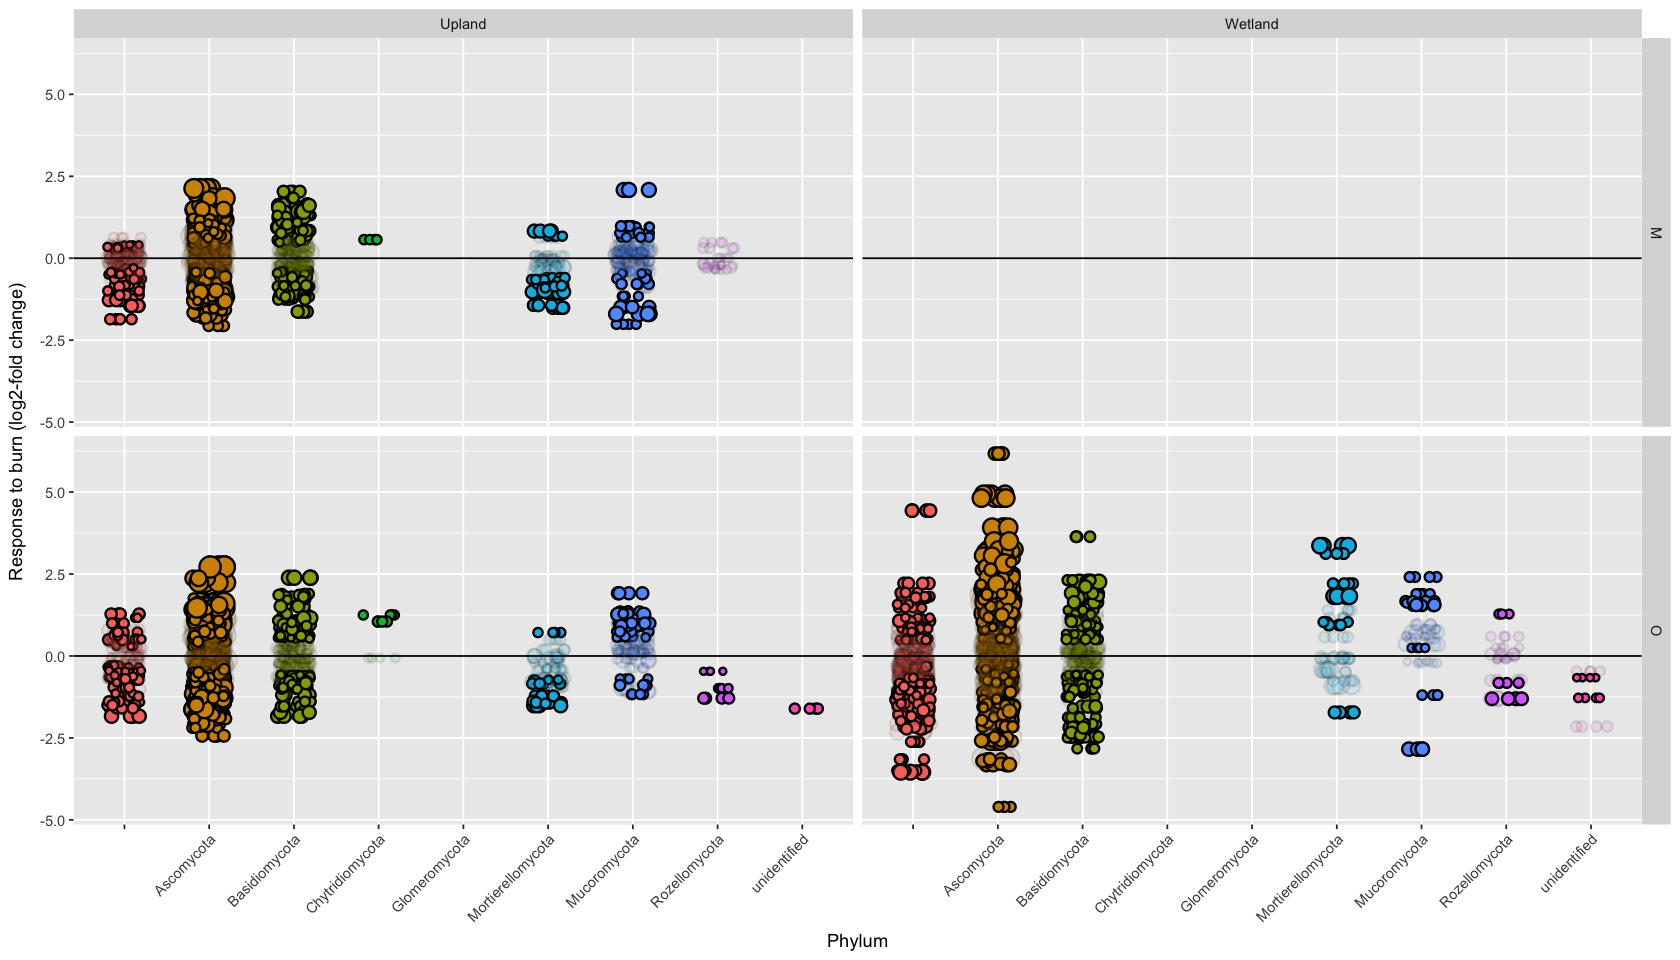

In [32]:
options(repr.plot.width=14, repr.plot.height=8)

nTax = 20

# Ordering factor by most abundant phyla
TaxOrder = FullResults%>%
    group_by(Phylum)%>%
    summarize(TotalOTUs=n())
TaxOrder = TaxOrder$Phylum
FullResults$Phylum = ordered(FullResults$Phylum, levels=TaxOrder)

p = ggplot(FullResults[FullResults$Phylum %in% TaxOrder[1:nTax],],aes(x=Phylum, y=logFC.Severity, alpha=sigSeverity, fill=Phylum))
p = p + geom_jitter(shape=21, stroke=1, aes(size=AveExpr.Severity), width=0.2)
p = p + theme(axis.text.x = element_text(angle=45, hjust=1))
p = p + facet_grid(~Org_or_Min~Land_Class, scales="free_x")
p = p + theme(legend.position="none")
p = p + geom_hline(yintercept=0) 
p = p + ylab("Response to burn (log2-fold change)")
p

In [44]:
colnames(FullResults)

[1] "Org_or_Min"         "Land_Class"         "OTU"               
 [4] "logFC.pH"           "AveExpr.pH"         "t.pH"              
 [7] "P.Value.pH"         "adj.P.Val.pH"       "logFC.Severity"    
[10] "AveExpr.Severity"   "t.Severity"         "P.Value.Severity"  
[13] "adj.P.Val.Severity" "Kingdom"            "Phylum"            
[16] "Class"              "Order"              "Family"            
[19] "Genus"              "Species"            "OTU_ID"            
[22] "taxonomy"           "Taxon"              "Taxon.Level"       
[25] "Trophic.Mode"       "Guild"              "Growth.Morphology" 
[28] "Trait"              "Confidence.Ranking" "Notes"             
[31] "Citation.Source"    "sigpH"              "sigSeverity"

In [21]:
df = FullResults%>%
    mutate(Responder = ifelse(logFC.Severity>0,ifelse(adj.P.Val.Severity<0.05,"Positive Sig","Positive"),
                             ifelse(adj.P.Val.Severity<0.05,"Negative Sig","Negative")))
df$Responder = as.factor(df$Responder)
df$Responder = ordered(df$Responder, levels=c("Positive Sig","Positive","Negative","Negative Sig"))


# Basically next step would be - identify which orgs respond pos vs neg to burns or burn severity.
# Then, look at - of that functional grouping, what fraction (of community abundance) increases vs.
# decreases in response to burn severity. I.e., is x% of the decomposers increasing?

Warning message:
“Removed 15107 rows containing missing values (position_stack).”

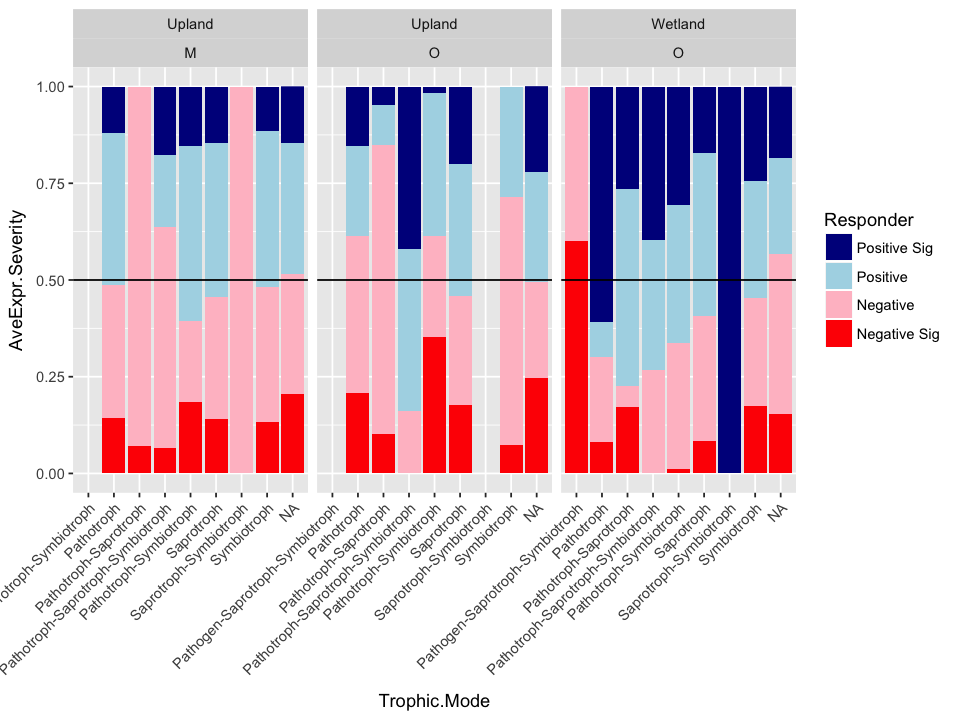

In [27]:
options(repr.plot.width=8, repr.plot.height=6)
p = ggplot(df, aes(x=Trophic.Mode, y=AveExpr.Severity, fill=Responder))
p = p +  geom_col(position="fill")
p = p + facet_wrap(~Land_Class*Org_or_Min)
p = p + scale_fill_manual(values=c("darkblue","lightblue","pink","red"))
p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p = p + geom_abline(slope=0,intercept=0.5)
p

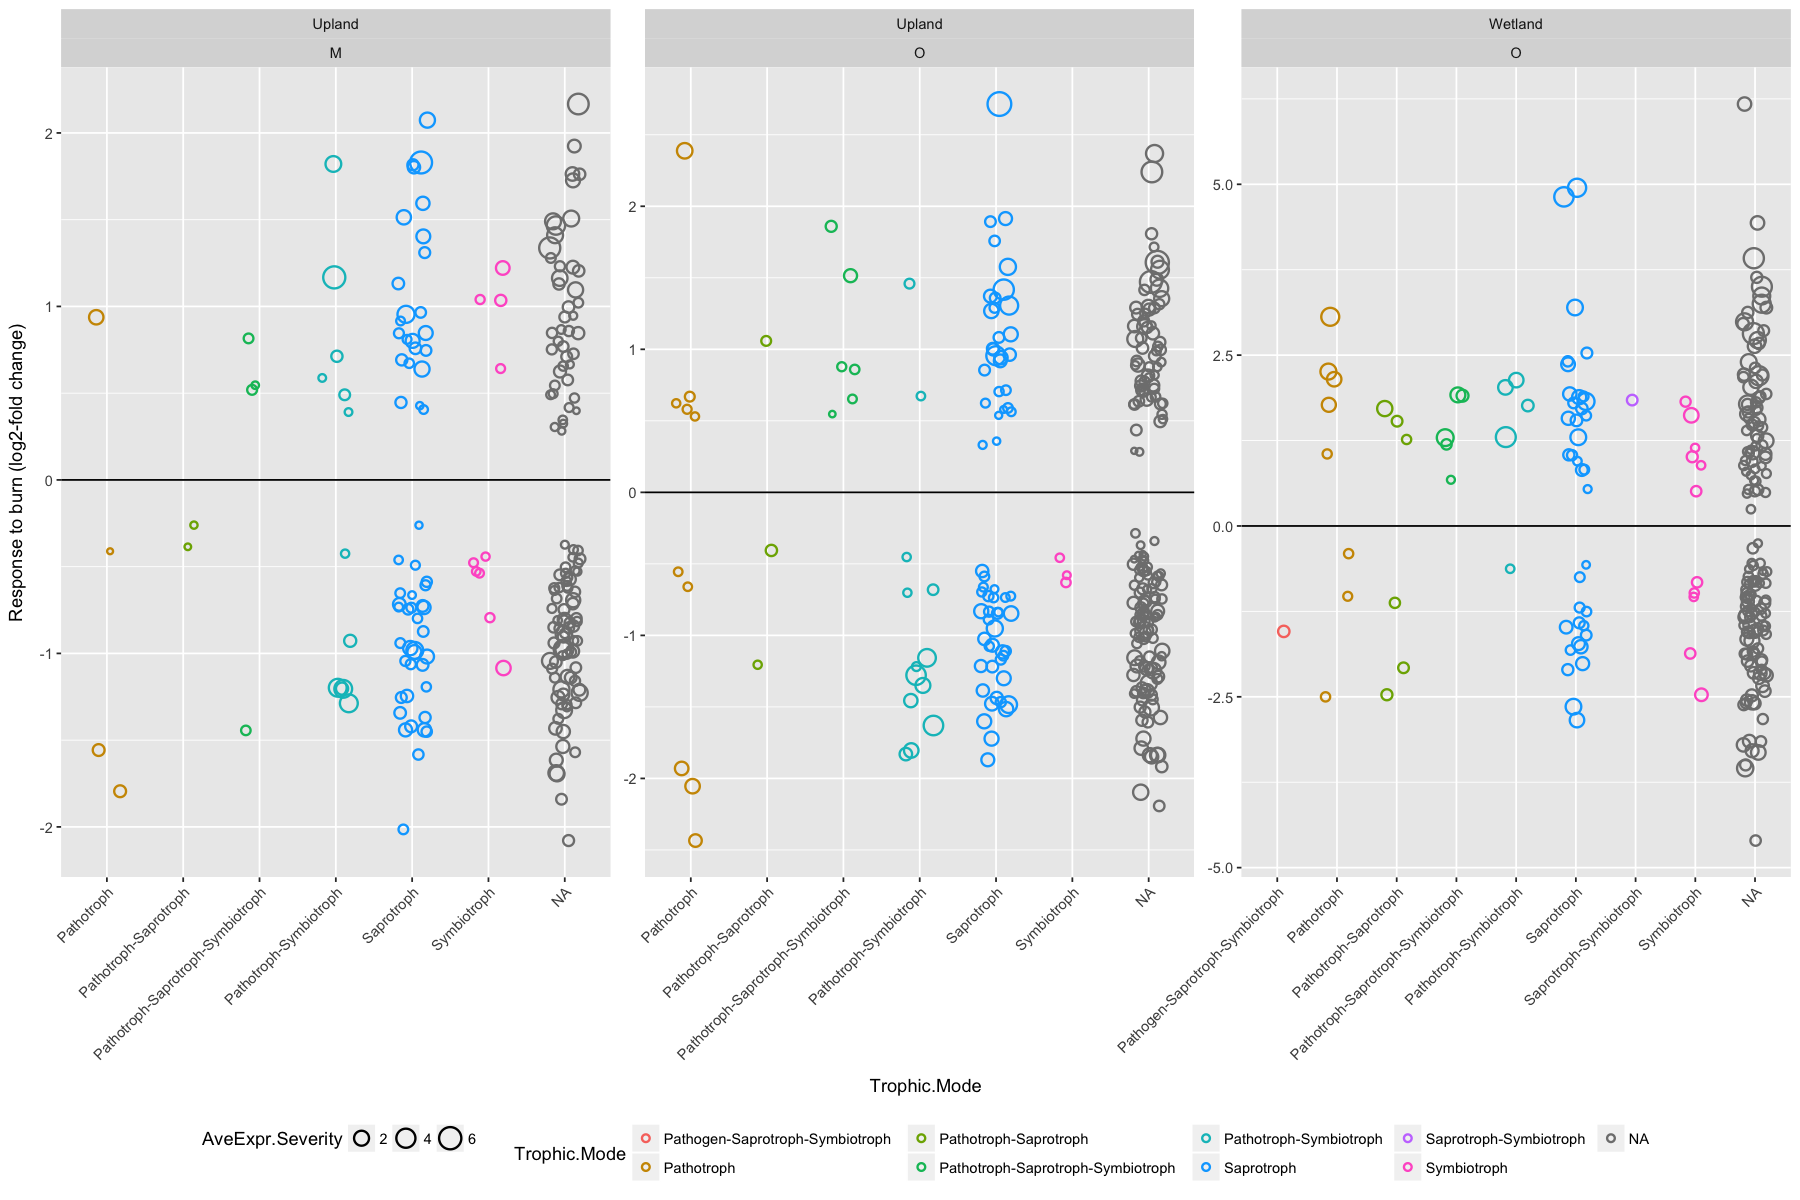

In [10]:
options(repr.plot.width=15, repr.plot.height=10)

nTax =50

df = FullResults%>%
    filter(adj.P.Val.Severity < 0.05)

# Ordering factor by most abundant phyla
TaxOrder = FullResults%>%
    group_by(Family)%>%
    summarize(TotalOTUs=n())%>%
    arrange(-TotalOTUs)
#TaxOrder = droplevels(as.factor(TaxOrder$Family))
#FullResults$Family = ordered(FullResults$Family, levels=TaxOrder)

#df = FullResults[FullResults$Family %in% TaxOrder[1:nTax],]

#df = df%>%
#    filter(Family != "unidentified")%>%
#    filter(Family != "")

p = ggplot(df,aes(x=Trophic.Mode, y=logFC.Severity, color=Trophic.Mode))
p = p + geom_jitter(shape=21, stroke=1, aes(size=AveExpr.Severity), width=0.2)
p = p + theme(axis.text.x = element_text(angle=45, hjust=1))
p = p + scale_alpha_manual(values=c(0.1,0.75))
p = p + facet_wrap(~Land_Class~Org_or_Min, scales="free",ncol=3)
p = p + theme(legend.position="bottom")
#p = p + scale_color_manual(guide=guide_legend(ncol = 3))
p = p + geom_hline(yintercept=0) 
p = p + ylab("Response to burn (log2-fold change)")
p

In [43]:
df = FullResults[!is.na(FullResults$OTU),]
df = df[df$adj.P.Val.Severity<0.05,]
df = df %>%
    group_by(Land_Class)%>%
    summarize(NSignif = n())
df

Land_Class NSignif
1 Upland     1896   
2 Wetland     912

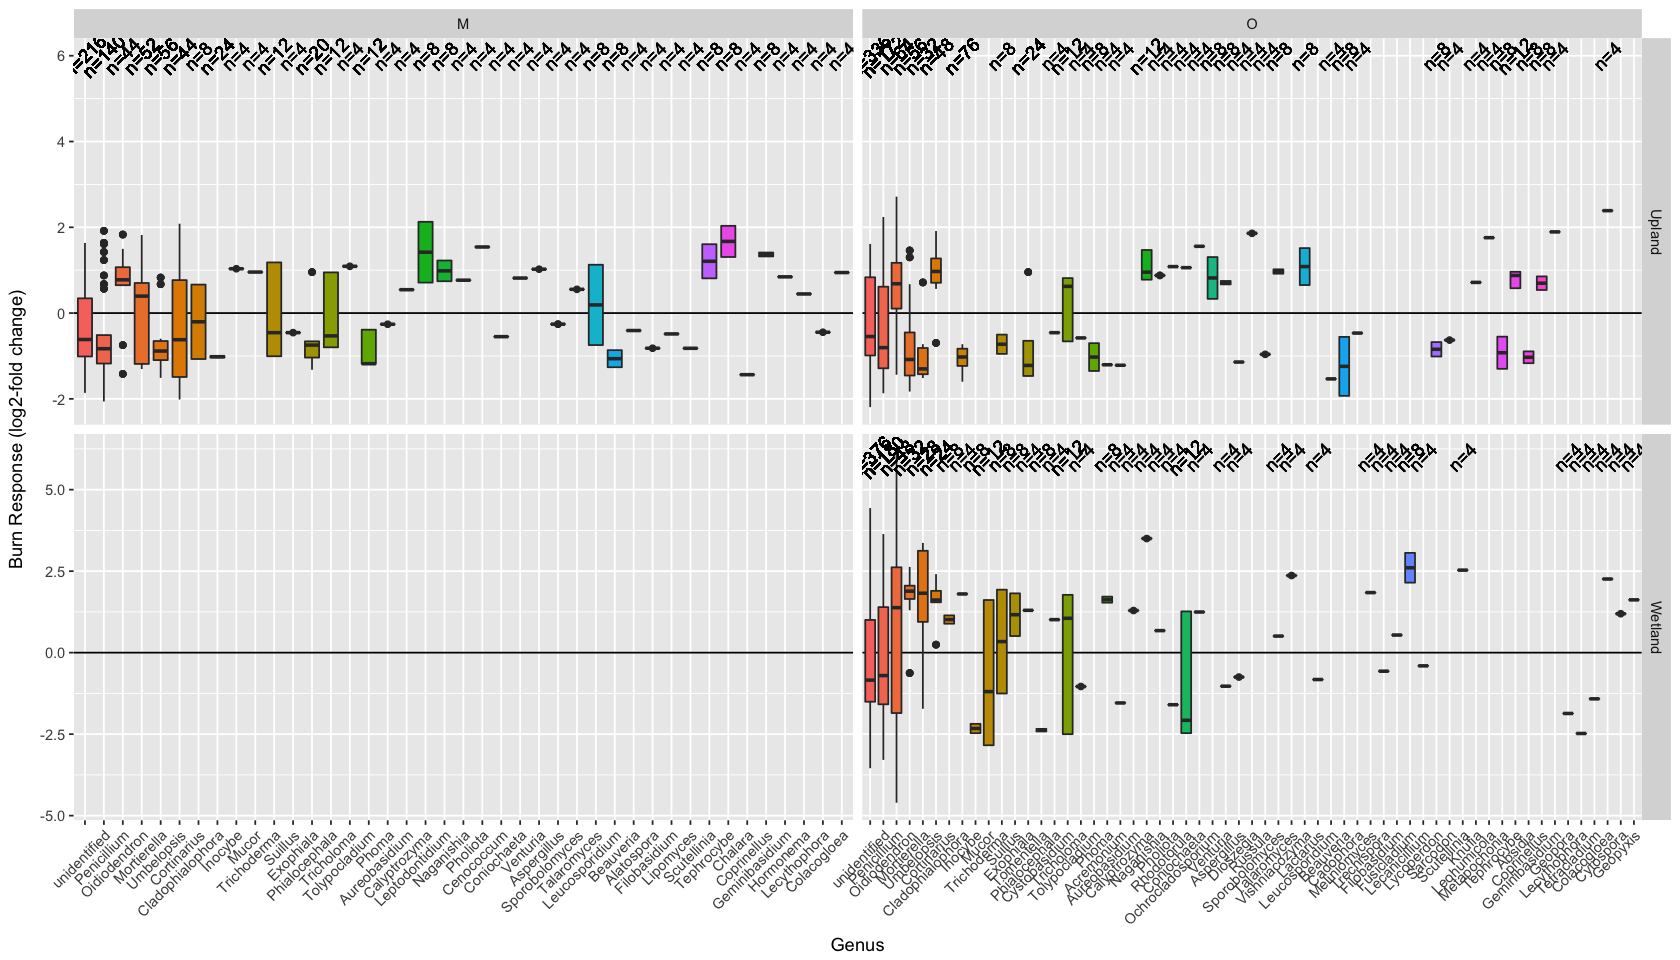

In [44]:
options(repr.plot.width=14, repr.plot.height=8)

df = FullResults%>%
    #FullResults[FullResults$Phylum == "Basidiomycota",]%>%
    group_by(Genus,Org_or_Min,Land_Class)%>%
    filter(adj.P.Val.Severity<0.05)%>%
    mutate(nTax=n())

TaxOrder = FullResults %>%
    group_by(Genus)%>%
    summarize(TotalOTUs=n())%>%
    arrange(-TotalOTUs)

TaxOrder$Genus = factor(TaxOrder$Genus, levels=TaxOrder$Genus[order(TaxOrder$TotalOTUs)], ordered=TRUE)

df$Genus = ordered(df$Genus, levels=TaxOrder$Genus)

p = ggplot(data=df[df$Genus %in% TaxOrder$Genus[1:100],],aes(x=Genus, y=logFC.Severity, fill=Genus))
#p = p + geom_jitter(shape=21, stroke=1, size=3, width=0.2)
p = p + geom_hline(yintercept=0)
#p = p + geom_point(pch=21, aes(size=AveExpr.CBI))
p = p + geom_boxplot()
p = p + theme(axis.text.x = element_text(angle=45, hjust=1))
p = p + facet_grid(~Land_Class~Org_or_Min, scales="free")
p = p + theme(legend.position="none")
p = p + geom_text(aes(label=paste("n=",nTax, sep=""), y = 6, angle=45))
p = p + ylab("Burn Response (log2-fold change)")
p

Warning message:
“Removed 444 rows containing missing values (geom_point).”

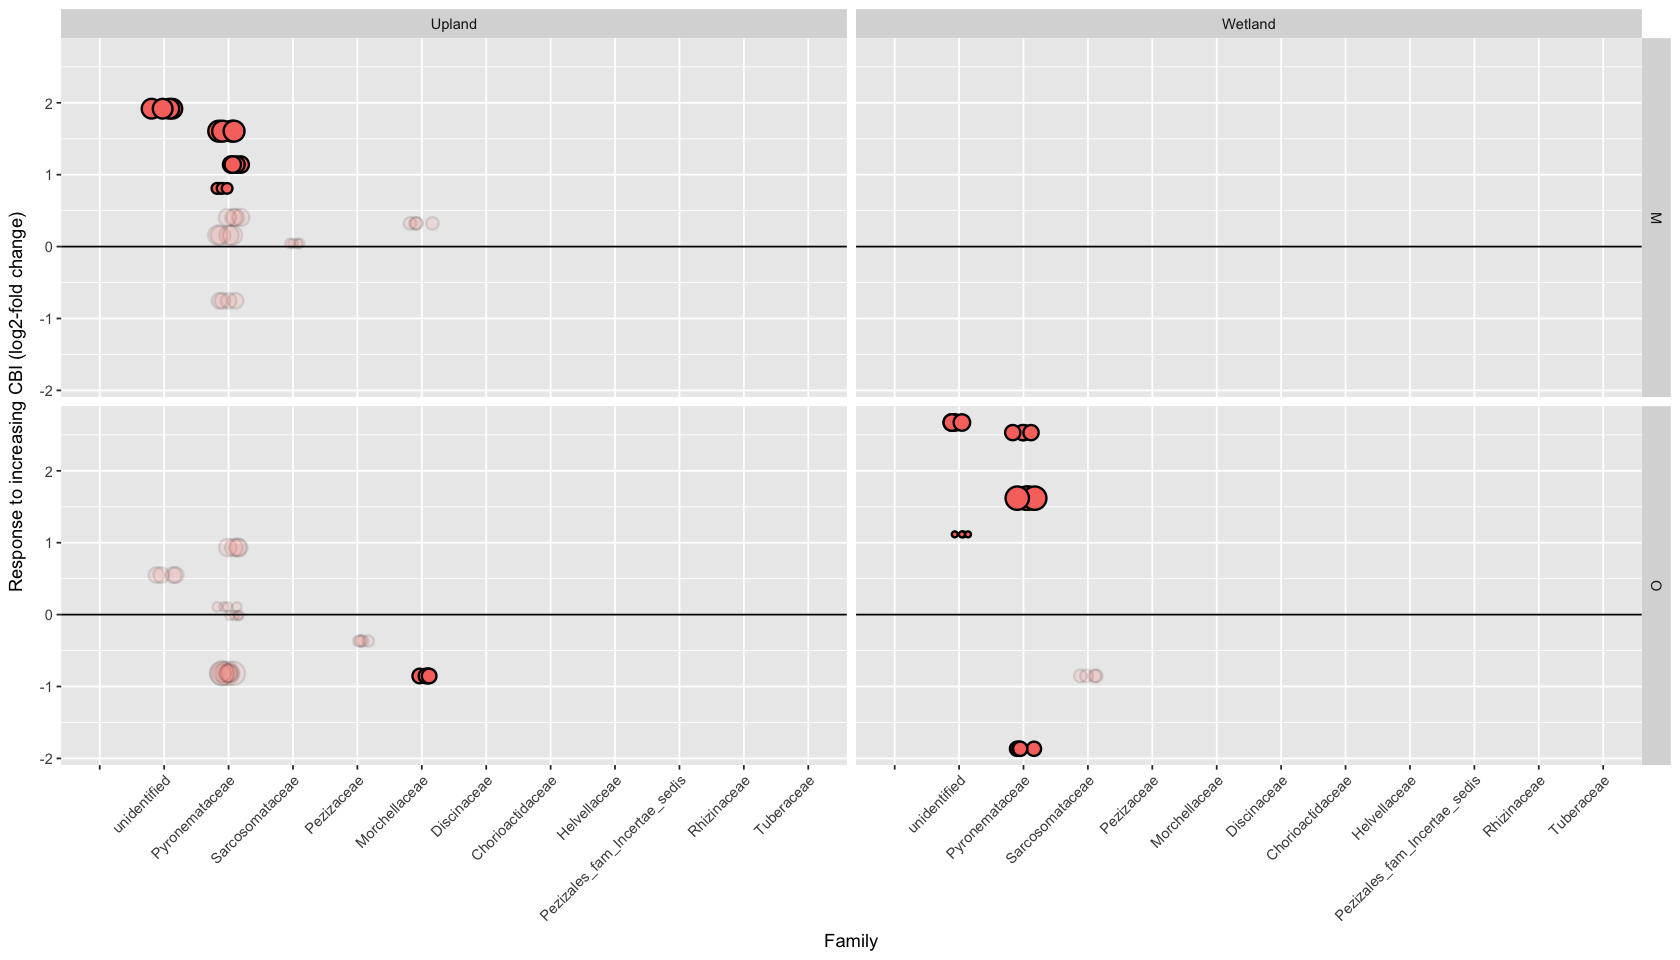

In [45]:
options(repr.plot.width=14, repr.plot.height=8)

df = FullResults[FullResults$Class == "Pezizomycetes",]%>%
    group_by(Family,Org_or_Min,Land_Class)%>%
    mutate(nTax=n())


p = ggplot(df,aes(x=Family, y=logFC.Severity, alpha=sigSeverity, fill=Phylum))
p = p + geom_jitter(shape=21, stroke=1, aes(size=AveExpr.Severity), width=0.2)
p = p + theme(axis.text.x = element_text(angle=45, hjust=1))
p = p + facet_grid(~Org_or_Min~Land_Class, scales="free_x")
p = p + theme(legend.position="none")
p = p + geom_hline(yintercept=0) 
p = p + ylab("Response to increasing CBI (log2-fold change)")
p

In [51]:
head(FullResults)

Org_or_Min Land_Class Severity_Class OTU    logFC.pH    AveExpr.pH t.pH      
1 O          Upland     High           sq1    -0.11994300 9.4566164  -0.1865540
2 O          Upland     High           sq10    1.69197666 4.6868130   3.3176715
3 O          Upland     High           sq100  -2.30148521 1.9806652  -5.0639143
4 O          Upland     High           NA              NA        NA          NA
5 O          Upland     High           sq1001 -0.02656208 0.3180524  -0.1168237
6 O          Upland     High           sq1002  0.40652158 0.7252678   1.2058083
  P.Value.pH   adj.P.Val.pH logFC.Severity ⋯ adj.P.Val.Severity Kingdom
1 8.531955e-01 0.9176565115 -0.12992633    ⋯ 0.87491324                
2 2.281374e-03 0.0134765693  1.41736177    ⋯ 0.01689662                
3 1.676876e-05 0.0002088805 -0.08888368    ⋯ 0.89425651                
4           NA           NA          NA    ⋯         NA                
5 9.077346e-01 0.9465549284 -0.55117677    ⋯ 0.01317566                
6 2.367879e-01 0.4321001863  0.77887689    ⋯ 0.04464291                
  Phylum        Class           Order                            
1 Ascomycota    Eurotiomycetes  Eurotiales                       
2 Ascomycota    Eurotiomycetes  Eurotiales                       
3 Ascomycota    Leotiomycetes   Leotiomycetes_ord_Incertae_sedis 
4 Basidiomycota Pucciniomycetes unidentified                     
5 Ascomycota    Leotiomycetes   unidentified                     
6 Ascomycota    Eurotiomycetes  Eurotiomycetes_ord_Incertae_sedis
  Family                            Genus        Species      sigpH sigSeverity
1 Trichocomaceae                    Penicillium               0.5   0.5        
2 Trichocomaceae                    Penicillium               1.0   1.0        
3 Myxotrichaceae                    Oidiodendron              1.0   0.5        
4 unidentified                      unidentified unidentified  NA    NA        
5 unidentified                      unidentified unidentified 0.5   1.0        
6 Eurotiomycetes_fam_Incertae_sedis Calyptrozyma unidentified 0.5   1.0

In [48]:
OWet = FullResults[FullResults$Org_or_Min=="O"&FullResults$Land_Class=="Wetland" & !is.na(FullResults$OTU),]
OUp = FullResults[FullResults$Org_or_Min=="O"&FullResults$Land_Class=="Upland" & !is.na(FullResults$OTU),]
MUp = FullResults[FullResults$Org_or_Min=="M"&FullResults$Land_Class=="Upland"& !is.na(FullResults$OTU),]
row.names(OWet)=OWet$OTU
row.names(OUp)=OUp$OTU
row.names(MUp)=MUp$OTU

Warning message:
“non-unique values when setting 'row.names': ‘sq1’, ‘sq10’, ‘sq1009’, ‘sq1013’, ‘sq102’, ‘sq1021’, ‘sq1027’, ‘sq103’, ‘sq1030’, ‘sq1031’, ‘sq1037’, ‘sq1043’, ‘sq1051’, ‘sq1052’, ‘sq1066’, ‘sq1067’, ‘sq107’, ‘sq1071’, ‘sq1072’, ‘sq1074’, ‘sq108’, ‘sq1088’, ‘sq1091’, ‘sq1092’, ‘sq11’, ‘sq110’, ‘sq1113’, ‘sq1114’, ‘sq112’, ‘sq1128’, ‘sq113’, ‘sq1130’, ‘sq1134’, ‘sq1138’, ‘sq114’, ‘sq1141’, ‘sq1142’, ‘sq1144’, ‘sq1155’, ‘sq116’, ‘sq1166’, ‘sq1171’, ‘sq1181’, ‘sq1187’, ‘sq1188’, ‘sq1191’, ‘sq1192’, ‘sq1193’, ‘sq1194’, ‘sq1199’, ‘sq12’, ‘sq1202’, ‘sq1209’, ‘sq121’, ‘sq1210’, ‘sq1212’, ‘sq1216’, ‘sq1222’, ‘sq123’, ‘sq1231’, ‘sq1235’, ‘sq1248’, ‘sq1249’, ‘sq1253’, ‘sq1255’, ‘sq126’, ‘sq1260’, ‘sq1267’, ‘sq1270’, ‘sq1271’, ‘sq1272’, ‘sq1284’, ‘sq129’, ‘sq1297’, ‘sq1299’, ‘sq13’, ‘sq130’, ‘sq1300’, ‘sq1307’, ‘sq131’, ‘sq1310’, ‘sq1315’, ‘sq132’, ‘sq1321’, ‘sq133’, ‘sq1330’, ‘sq1331’, ‘sq1332’, ‘sq1337’, ‘sq1338’, ‘sq135’, ‘sq1354’, ‘sq1356’, ‘sq1364’, ‘sq1365’, ‘sq137’, ‘sq1378’

ERROR: Error in `row.names<-.data.frame`(`*tmp*`, value = structure(c("sq1", : duplicate 'row.names' are not allowed


In [94]:
OWetvsOUp = merge(OWet,OUp,by=0, suffixes=c(".OWet",".OUp"))
OUpvsMUp = merge(OUp,MUp,by=0, suffixes=c(".OUp",".MUp"))
OWetvsOUp$AveExpr.Severity = (OWetvsOUp$AveExpr.Severity.OWet+OWetvsOUp$AveExpr.Severity.OUp)/2
OUpvsMUp$AveExpr.Severity = (OUpvsMUp$AveExpr.Severity.OUp + OUpvsMUp$AveExpr.Severity.MUp)/2
OUpvsMUp$sigSeverityAlpha = (OUpvsMUp$sigSeverity.MUp * OUpvsMUp$sigSeverity.OUp)
OWetvsOUp$sigSeverityAlpha = (OWetvsOUp$sigSeverity.OWet * OWetvsOUp$sigSeverity.OUp)

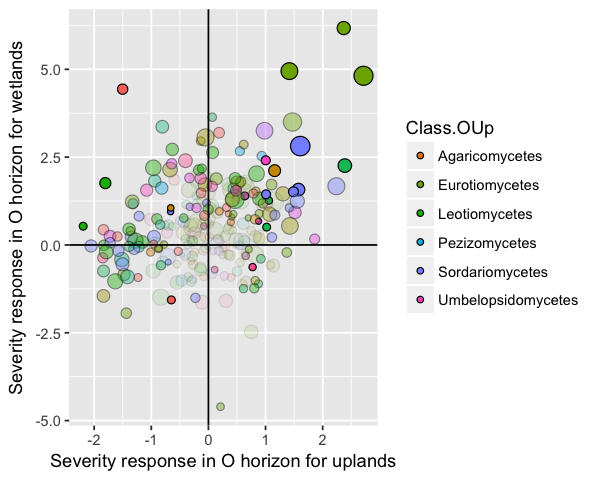

In [122]:
options(repr.plot.width=5, repr.plot.height=4)
df = OWetvsOUp
p = ggplot(df,aes(x=logFC.Severity.OUp,y=logFC.Severity.OWet, fill=Class.OUp, size=AveExpr.Severity, alpha=sigSeverityAlpha))
p = p + geom_point(pch=21)
#p = p + facet_wrap(~Phylum.OUp)
p = p + geom_hline(yintercept=0) + geom_vline(xintercept=0)
p = p + scale_fill_discrete(breaks = c("Agaricomycetes","Eurotiomycetes", "Leotiomycetes", "Pezizomycetes","Sordariomycetes","Umbelopsidomycetes"))
p = p + scale_size_continuous(guide=FALSE)
p = p + scale_alpha_continuous(guide=FALSE)
#p = p + ylim(-0.3,0.3) + xlim (-0.3,0.3)
#p = p + stat_summary(fun.data=mean_cl_normal) + geom_smooth(method='lm',formula=y~x)
p = p + xlab("Severity response in O horizon for uplands")
p = p + ylab("Severity response in O horizon for wetlands")
p

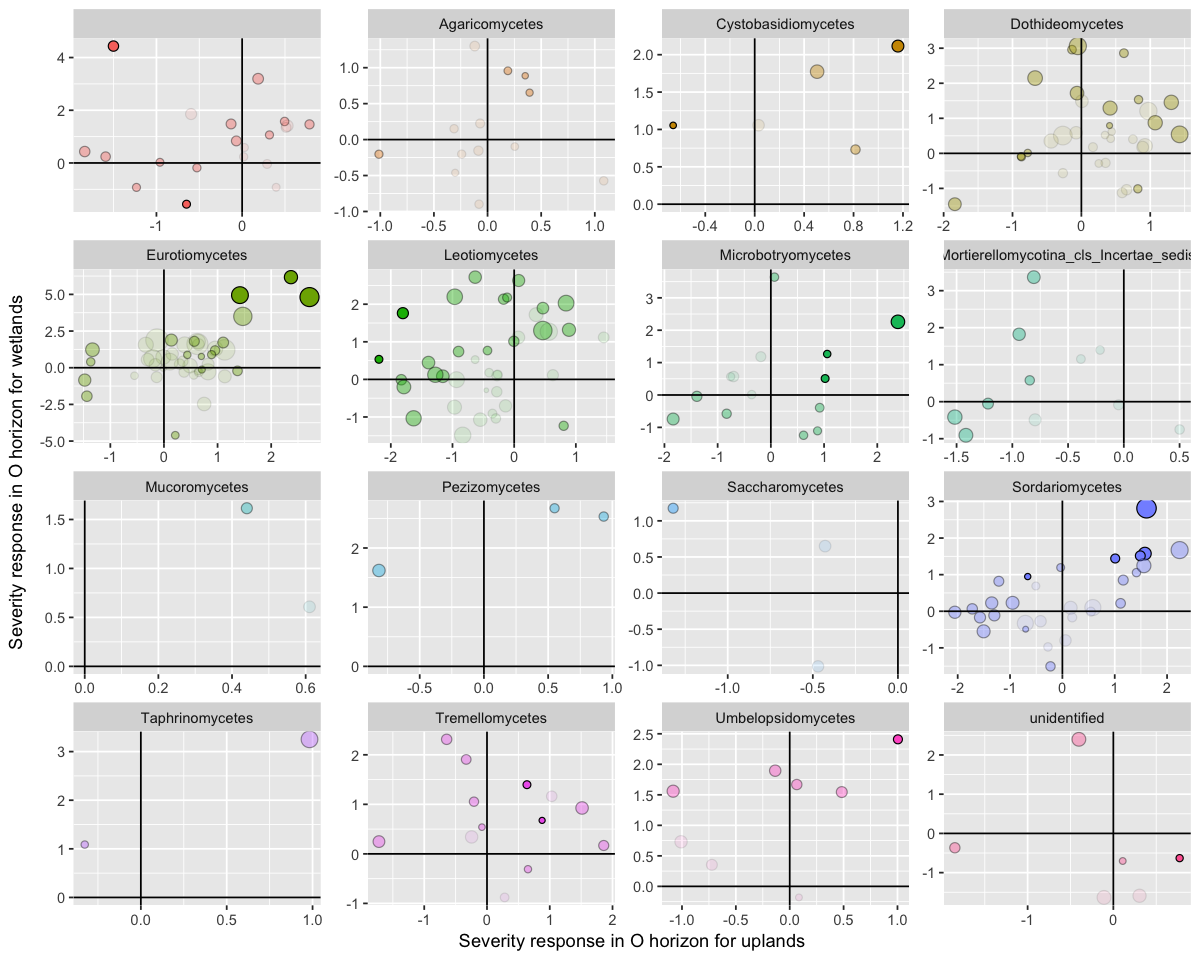

In [123]:
options(repr.plot.width=10, repr.plot.height=8)
#df = OWetvsOUp[OWetvsOUp$Phylum.OWet %in% c("Proteobacteria","Actinobacteria","Planctomycetes","Chloroflexi","Acidobacteria","Bacteroidetes","Verrucomicrobia","Firmicutes"),]
df = OWetvsOUp
p = ggplot(df,aes(y=logFC.Severity.OWet,x=logFC.Severity.OUp, fill=Class.OWet, size=AveExpr.Severity, alpha=sigSeverityAlpha))
p = p + geom_point(pch=21)
p = p + facet_wrap(~Class.OWet, scales = "free")
p = p + geom_hline(yintercept=0) + geom_vline(xintercept=0)
p = p + xlab("Severity response in O horizon for uplands")
p = p + ylab("Severity response in O horizon for wetlands")
p = p + guides(fill=FALSE)
p = p + scale_size_continuous(guide=FALSE)
p = p + scale_alpha_continuous(guide=FALSE)
#p = p + ylim(-0.3,0.3) + xlim (-0.3,0.3)
p

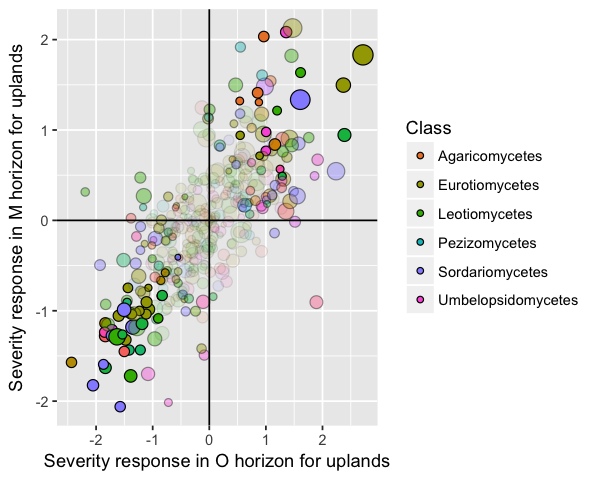

In [118]:
options(repr.plot.width=5, repr.plot.height=4)
df = OUpvsMUp
p = ggplot(df,aes(x=logFC.Severity.OUp,y=logFC.Severity.MUp, fill=Class.OUp, size=AveExpr.Severity, alpha=sigSeverityAlpha))
p = p + geom_point(pch=21)
#p = p + facet_wrap(~Phylum.OUp)
p = p + geom_hline(yintercept=0) + geom_vline(xintercept=0)
p = p + guides(fill=guide_legend(title="Class"))
p = p + scale_fill_discrete(breaks = c("Agaricomycetes","Eurotiomycetes", "Leotiomycetes", "Pezizomycetes","Sordariomycetes","Umbelopsidomycetes"))
p = p + scale_size_continuous(guide=FALSE)
p = p + scale_alpha_continuous(guide=FALSE)
#p = p + ylim(-0.3,0.3) + xlim (-0.3,0.3)
#p = p + stat_summary(fun.data=mean_cl_normal) + geom_smooth(method='lm',formula=y~x)
p = p + xlab("Severity response in O horizon for uplands")
p = p + ylab("Severity response in M horizon for uplands")
p

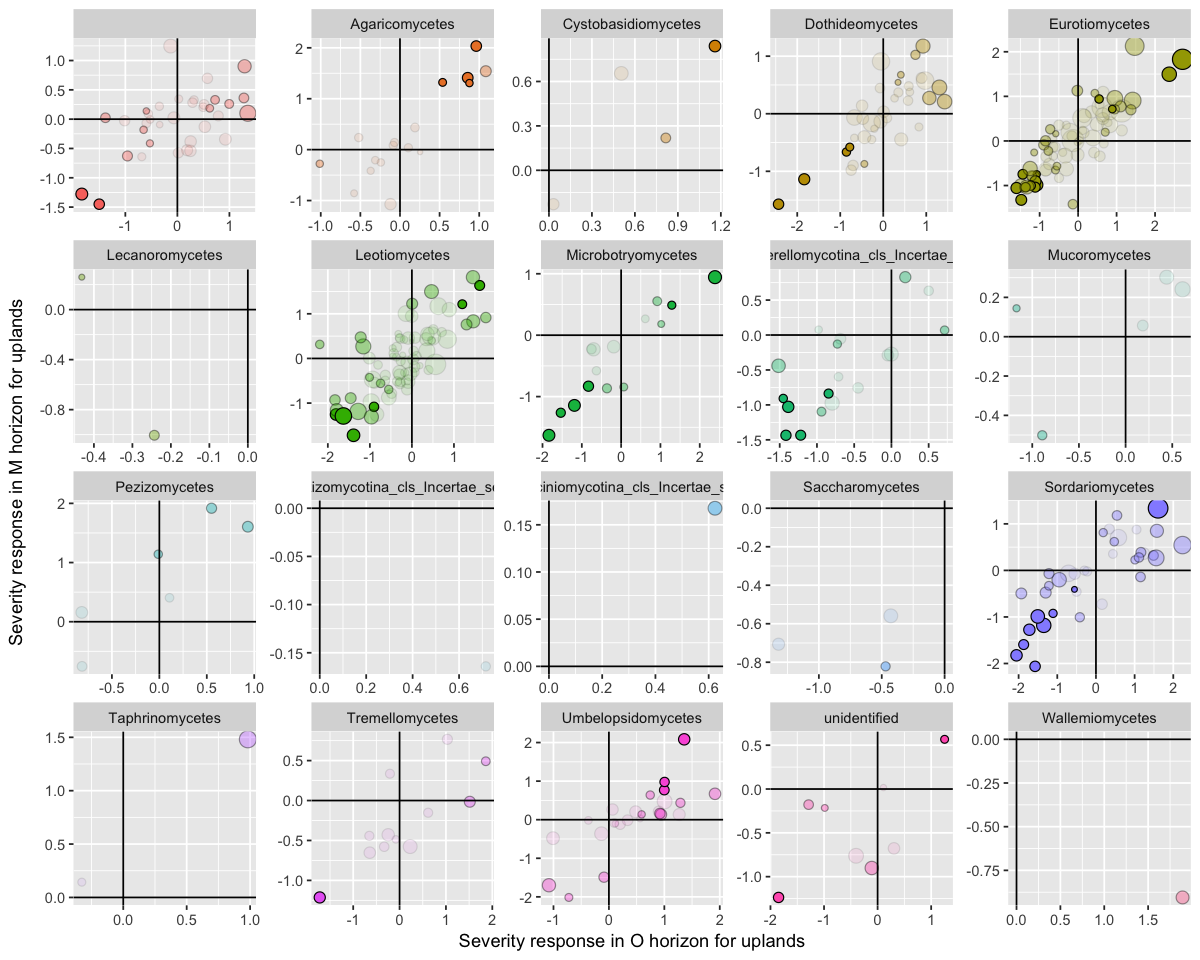

In [120]:
options(repr.plot.width=10, repr.plot.height=8)
#df = OUpvsMUp[OUpvsMUp$Phylum.OUp %in% c("Proteobacteria","Actinobacteria","Planctomycetes","Chloroflexi","Acidobacteria","Bacteroidetes","Verrucomicrobia","Firmicutes"),]
df = OUpvsMUp
p = ggplot(df,aes(x=logFC.Severity.OUp,y=logFC.Severity.MUp, fill=Class.OUp, size=AveExpr.Severity, alpha=sigSeverityAlpha))
p = p + geom_point(pch=21)
p = p + facet_wrap(~Class.OUp, scales="free")
p = p + geom_hline(yintercept=0) + geom_vline(xintercept=0)
p = p + guides(fill=FALSE)
p = p + scale_size_continuous(guide=FALSE)
p = p + scale_alpha_continuous(guide=FALSE)
#p = p + ylim(-0.3,0.3) + xlim (-0.3,0.3)
#p = p + stat_summary(fun.data=mean_cl_normal) + geom_smooth(method='lm',formula=y~x)
p = p + xlab("Severity response in O horizon for uplands")
p = p + ylab("Severity response in M horizon for uplands")
p


In [158]:
levels(droplevels(OUpvsMUp$Family.OUp))

[1] ""                                    "Agaricaceae"                        
 [3] "Atheliaceae"                         "Bulleribasidiaceae"                 
 [5] "Clavicipitaceae"                     "Coniochaetaceae"                    
 [7] "Cordycipitaceae"                     "Cortinariaceae"                     
 [9] "Cunninghamellaceae"                  "Cystobasidiaceae"                   
[11] "Cystofilobasidiaceae"                "Dothioraceae"                       
[13] "Eurotiomycetes_fam_Incertae_sedis"   "Filobasidiaceae"                    
[15] "Geminibasidiaceae"                   "Gloniaceae"                         
[17] "Helotiales_fam_Incertae_sedis"       "Herpotrichiellaceae"                
[19] "Heterogastridiaceae"                 "Hygrophoraceae"                     
[21] "Hypocreaceae"                        "Hypocreales_fam_Incertae_sedis"     
[23] "Leotiomycetes_fam_Incertae_sedis"    "Leptosphaeriaceae"                  
[25] "Leucosporidiaceae"                   "Lipomycetaceae"                     
[27] "Lyophyllaceae"                       "Mortierellaceae"                    
[29] "Mucoraceae"                          "Myxotrichaceae"                     
[31] "Nectriaceae"                         "Ophiocordycipitaceae"               
[33] "Pezizomycotina_fam_Incertae_sedis"   "Piskurozymaceae"                    
[35] "Pleosporaceae"                       "Pleosporales_fam_Incertae_sedis"    
[37] "Protomycetaceae"                     "Psathyrellaceae"                    
[39] "Pucciniomycotina_fam_Incertae_sedis" "Pyronemataceae"                     
[41] "Sordariaceae"                        "Sporidiobolales_fam_Incertae_sedis" 
[43] "Strophariaceae"                      "Suillaceae"                         
[45] "Tremellaceae"                        "Trichocomaceae"                     
[47] "Tricholomataceae"                    "Trichosporonaceae"                  
[49] "Umbelopsidaceae"                     "unidentified"                       
[51] "Valsaceae"                           "Venturiaceae"                       
[53] "Vibrisseaceae"

In [153]:
head(df)

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

Row.names Org_or_Min.OUp Land_Class.OUp OTU.OUp logFC.pH.OUp
     AveExpr.pH.OUp t.pH.OUp P.Value.pH.OUp adj.P.Val.pH.OUp logFC.Severity.OUp
     ⋯ Phylum.MUp Class.MUp Order.MUp Family.MUp Genus.MUp Species.MUp
     sigpH.MUp sigSeverity.MUp AveExpr.Severity sigSeverityAlpha

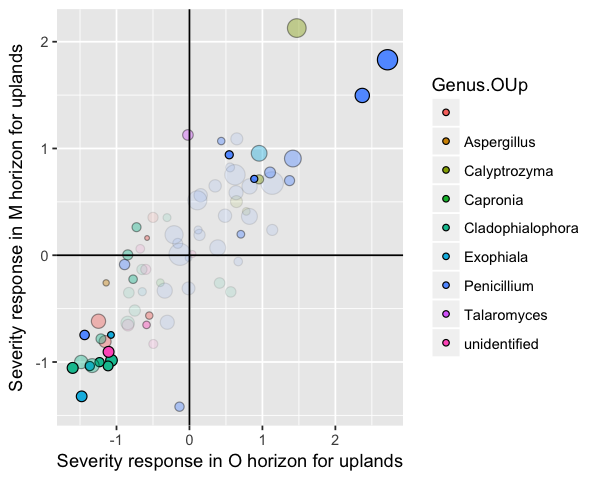

In [194]:
options(repr.plot.width=5, repr.plot.height=4)
df = OUpvsMUp%>%
    filter(Class.OUp=="Eurotiomycetes")
df$OTU.OUp = as.factor(df$OTU.OUp)
p = ggplot(df,aes(x=logFC.Severity.OUp,y=logFC.Severity.MUp,fill=Genus.OUp,size=AveExpr.Severity, alpha=sigSeverityAlpha))
p = p + geom_point(pch=21)
#p = p + facet_wrap(~Phylum.OUp)
p = p + geom_hline(yintercept=0) + geom_vline(xintercept=0)
#p = p + guides(fill=guide_legend(title="Class"))
#p = p + scale_fill_discrete(breaks = c("Agaricomycetes","Eurotiomycetes", "Leotiomycetes", "Pezizomycetes","Sordariomycetes","Umbelopsidomycetes"))
p = p + scale_size_continuous(guide=FALSE)
p = p + scale_alpha_continuous(guide=FALSE)
#p = p + ylim(-0.3,0.3) + xlim (-0.3,0.3)
#p = p + stat_summary(fun.data=mean_cl_normal) + geom_smooth(method='lm',formula=y~x)
p = p + xlab("Severity response in O horizon for uplands")
p = p + ylab("Severity response in M horizon for uplands")
p

In [99]:
OWetvsOUpResponses = OWetvsOUp %>%
    mutate(Responses=ifelse(logFC.Severity.OWet>0&logFC.Severity.OUp>0,"BothPos",ifelse(logFC.Severity.OWet<0&logFC.Severity.OUp<0,"BothNeg",ifelse(logFC.Severity.OWet>0&logFC.Severity.OUp<0,"WetPosUpNeg",ifelse(logFC.Severity.OWet<0&logFC.Severity.OUp>0,"UpPosWetNeg","NA")))))%>%
    group_by(Responses)%>%
    summarize(Total=n())
OWetvsOUpResponses$Trtmt = rep("OWetvsOUp",4)

In [100]:
OUpvsMUpResponses = OUpvsMUp %>%
    mutate(Responses=ifelse(logFC.Severity.OUp>0&logFC.Severity.MUp>0,"BothPos",ifelse(logFC.Severity.OUp<0&logFC.Severity.MUp<0,"BothNeg",ifelse(logFC.Severity.OUp>0&logFC.Severity.MUp<0,"OPosMNeg",ifelse(logFC.Severity.OUp<0&logFC.Severity.MUp>0,"MPosONeg","NA")))))%>%
    group_by(Responses)%>%
    summarize(Total=n())
OUpvsMUpResponses$Trtmt = rep("OUpvsMUp",4)

In [101]:
Responses = rbind(OUpvsMUpResponses,OWetvsOUpResponses)
Responses$Responses = ordered(Responses$Responses, levels=c("WetPosUpNeg","UpPosWetNeg","MPosONeg","OPosMNeg","BothNeg","BothPos"))
Responses$TotalSign = ifelse((Responses$Responses == "BothNeg"), Responses$Total, -Responses$Total)
Responses

Responses   Total Trtmt     TotalSign
1 BothNeg     162   OUpvsMUp   162     
2 BothPos     141   OUpvsMUp  -141     
3 MPosONeg     47   OUpvsMUp   -47     
4 OPosMNeg     33   OUpvsMUp   -33     
5 BothNeg      49   OWetvsOUp   49     
6 BothPos      92   OWetvsOUp  -92     
7 UpPosWetNeg  33   OWetvsOUp  -33     
8 WetPosUpNeg  74   OWetvsOUp  -74

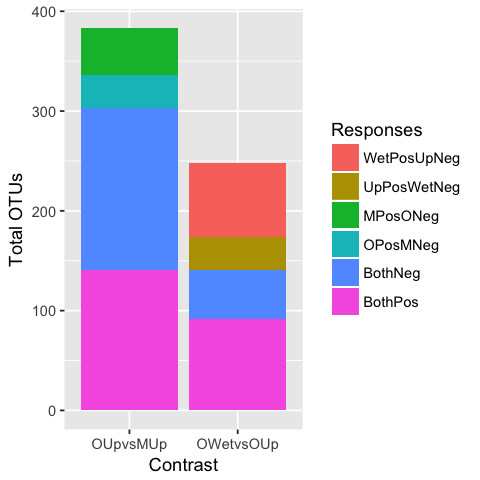

In [102]:
options(repr.plot.width=4, repr.plot.height=4)
p = ggplot(Responses, aes(x=Trtmt, y=Total))
p = p + geom_bar(aes(fill=Responses), stat="identity")
p = p + ylab("Total OTUs") + xlab("Contrast")
p

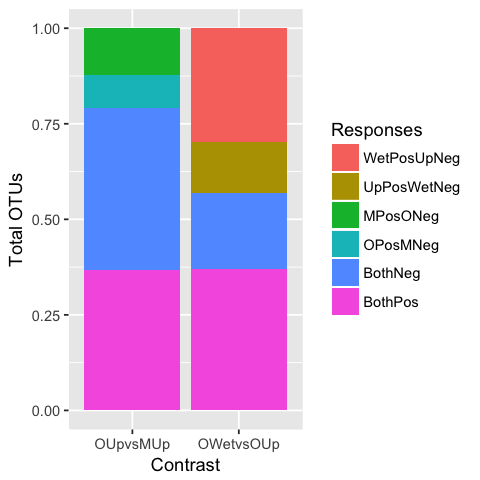

In [103]:
options(repr.plot.width=4, repr.plot.height=4)

ScaledResponses = Responses %>%
    group_by(Trtmt)%>%
    mutate(Fract=Total/sum(Total))

p = ggplot(ScaledResponses, aes(x=Trtmt, y=Fract))
p = p + geom_bar(aes(fill=Responses), stat="identity")
p = p + ylab("Total OTUs") + xlab("Contrast")
p

### Trying with including %C instead of Org_or_Min and Veg_Comm

In [104]:
    MRexp = biom.MRexp 
    MRexp = cumNorm(MRexp, cumNormStat(MRexp, qFlag=TRUE, pFlag = FALSE))
    ModelData = pData(MRexp)
    #ModelData$Understory_CBI = as.numeric(ModelData$Understory_CBI)
    ModelData$pH = as.numeric(ModelData$pH)
    ModelData$TC_pct = as.numeric(ModelData$TC_pct)
    ModelData$Veg_Comm = make.names(ModelData$Veg_Comm)
    ModelData$Burned_Unburned = as.factor(ModelData$Burned_Unburned)
    ModelData$Burned_Unburned = ordered(ModelData$Burned_Unburned, levels = c('Unburned','Burned'))
    #model = model.matrix(~Veg_Comm+TC_pct+pH+Understory_CBI, data=ModelData)
    model = model.matrix(~Veg_Comm+TC_pct+pH+Burned_Unburned, data=ModelData)
    settings = zigControl(tol = 1e-04, maxit = 30, verbose = TRUE, dfMethod = "default", pvalMethod = "default")
    fit = fitZig(obj=MRexp, mod=model, control = settings, useCSSoffset = TRUE, zeroMod = NULL, useMixedModel = FALSE)

Default value being used.


it= 0, nll=123.65, log10(eps+1)=Inf, stillActive=5670
it= 1, nll=117.43, log10(eps+1)=Inf, stillActive=4697
it= 2, nll=115.26, log10(eps+1)=Inf, stillActive=3278
it= 3, nll=118.43, log10(eps+1)=Inf, stillActive=1848
it= 4, nll=118.56, log10(eps+1)=Inf, stillActive=1262
it= 5, nll=118.42, log10(eps+1)=Inf, stillActive=921
it= 6, nll=119.64, log10(eps+1)=Inf, stillActive=520
it= 7, nll=120.48, log10(eps+1)=Inf, stillActive=321
it= 8, nll=121.00, log10(eps+1)=Inf, stillActive=220
it= 9, nll=121.05, log10(eps+1)=Inf, stillActive=202
it=10, nll=121.13, log10(eps+1)=Inf, stillActive=184
it=11, nll=121.20, log10(eps+1)=Inf, stillActive=163
it=12, nll=121.23, log10(eps+1)=Inf, stillActive=159
it=13, nll=121.24, log10(eps+1)=Inf, stillActive=159
it=14, nll=121.25, log10(eps+1)=Inf, stillActive=158
it=15, nll=121.26, log10(eps+1)=Inf, stillActive=156
it=16, nll=121.27, log10(eps+1)=Inf, stillActive=155
it=17, nll=121.27, log10(eps+1)=Inf, stillActive=155
it=18, nll=121.27, log10(eps+1)=Inf, stil

In [105]:
    EffSamp = calculateEffectiveSamples(fit)
    MeanEffSamp = mean(EffSamp[!is.na(EffSamp)])
    #MedianEffSamp = median(EffSamp[!is.na(EffSamp)])
# Effective sample size is calculates, and the average values of this is determined
    rareFeatures = which(rowSums(MRcounts(MRexp) > 0) < MeanEffSamp)
# These are the taxa that that had less than the average number of effective samples
# As recommended in the vignette: https://www.bioconductor.org/packages/devel/bioc/vignettes/metagenomeSeq/inst/doc/metagenomeSeq.pdf
    MRexp = MRexp[-rareFeatures, ]
# Take the data object and remove the rareFeatures (taxa)
# Re-run the analyses below.
    MRexp = cumNorm(MRexp, cumNormStat(MRexp, qFlag=TRUE, pFlag = FALSE))
    ModelData = pData(MRexp)

Default value being used.


In [106]:
    ModelData$Understory_CBI = as.numeric(ModelData$Understory_CBI)
    ModelData$pH = as.numeric(ModelData$pH)
    ModelData$TC_pct = as.numeric(ModelData$TC_pct)
    ModelData$Veg_Comm = make.names(ModelData$Veg_Comm)
    ModelData$Burned_Unburned = as.factor(ModelData$Burned_Unburned)
    ModelData$Burned_Unburned = ordered(ModelData$Burned_Unburned, levels = c('Unburned','Burned'))
#    model = model.matrix(~Veg_Comm+TC_pct+pH+Understory_CBI, data=ModelData)
    model = model.matrix(~Veg_Comm+TC_pct+pH+Burned_Unburned, data=ModelData)
# Creating the model that we will use to analyze our data.
    fit = fitZig(obj=MRexp, mod=model, control = settings, useCSSoffset = TRUE, zeroMod = NULL, useMixedModel = FALSE)
#Re-running the fit with the EffSamp - normalized data    

it= 0, nll=143.59, log10(eps+1)=Inf, stillActive=289
it= 1, nll=158.39, log10(eps+1)=0.01, stillActive=5
it= 2, nll=158.59, log10(eps+1)=0.00, stillActive=1
it= 3, nll=158.62, log10(eps+1)=0.00, stillActive=1
it= 4, nll=158.62, log10(eps+1)=0.00, stillActive=1
it= 5, nll=158.62, log10(eps+1)=0.00, stillActive=1
it= 6, nll=158.62, log10(eps+1)=0.00, stillActive=1
it= 7, nll=158.61, log10(eps+1)=0.00, stillActive=1
it= 8, nll=158.60, log10(eps+1)=0.00, stillActive=1
it= 9, nll=158.59, log10(eps+1)=0.00, stillActive=1
it=10, nll=158.58, log10(eps+1)=0.00, stillActive=1
it=11, nll=158.57, log10(eps+1)=0.00, stillActive=1
it=12, nll=158.57, log10(eps+1)=0.00, stillActive=1
it=13, nll=158.56, log10(eps+1)=0.00, stillActive=1
it=14, nll=158.56, log10(eps+1)=0.00, stillActive=1
it=15, nll=158.55, log10(eps+1)=0.00, stillActive=1
it=16, nll=158.55, log10(eps+1)=0.00, stillActive=0


In [123]:
    modeldesign = fit$fit$design
    modelfit = fit$fit
    modelfit.treat = treat(modelfit, lfc=0)

In [124]:
colnames(modelfit)

[1] "(Intercept)"           "Veg_CommJack.Pine"     "Veg_CommMixedwood"    
[4] "Veg_CommOpen.Wetland"  "Veg_CommTreed.Wetland" "TC_pct"               
[7] "pH"                    "Burned_Unburned.L"     "scalingFactor"

In [125]:
    #resultsTC=topTreat(modelfit.treat, coef=2, number=7500)
    resultsSeverity=topTreat(modelfit.treat, coef=8, number=7500)
    #results=merge(resultsTC,resultsSeverity,by=0, all=TRUE, suffixes=c(".TC",".Severity"))
    results=merge(data.frame(),resultsSeverity,by=0, all=TRUE, suffixes=c(".Severity"))

In [126]:
row.names(results)=results$Row.names
results= merge(results,fData(biom.MRexp),by=0,all=TRUE)
results = results[,2:dim(results)[2]]
colnames(results)[1]="OTU"
#results$sigTC = ifelse(results$adj.P.Val.TC<0.05,1,0.5)
results$sigSeverity = ifelse(results$adj.P.Val<0.05,1,0.5)

Warning message in merge.data.frame(results, fData(biom.MRexp), by = 0, all = TRUE):
“column name ‘Row.names’ is duplicated in the result”

In [127]:
colnames(results)

[1] "OTU"                "logFC"              "AveExpr"           
 [4] "t"                  "P.Value"            "adj.P.Val"         
 [7] "Kingdom"            "Phylum"             "Class"             
[10] "Order"              "Family"             "Genus"             
[13] "Species"            "OTU_ID"             "taxonomy"          
[16] "Taxon"              "Taxon.Level"        "Trophic.Mode"      
[19] "Guild"              "Growth.Morphology"  "Trait"             
[22] "Confidence.Ranking" "Notes"              "Citation.Source"   
[25] "sigSeverity"

In [128]:
mdf = psmelt(ps.norm)

In [129]:
OTUTable = data.frame(OTU=row.names(t(otu_table(ps.norm))),(t(otu_table(ps.norm))))
head(OTUTable)

OTU X15S.NT.19O X15S.NT.20O  X15S.NT.21M  X15S.NT.21O  X15S.NT.22M 
sq1 sq1 0.216930610 0.0006697251 7.274037e-03 1.638250e-03 2.203423e-01
sq2 sq2 0.016716395 0.0019756890 2.664746e-03 1.820278e-04 1.373306e-01
sq3 sq3 0.004016525 0.0003348625 4.958588e-02 0.000000e+00 3.957653e-04
sq4 sq4 0.006273430 0.0181495496 2.340655e-03 3.640556e-04 8.805778e-03
sq5 sq5 0.001568357 0.0003683488 0.000000e+00 6.067593e-05 8.673856e-03
sq6 sq6 0.007382756 0.0005022938 3.601008e-05 0.000000e+00 6.596089e-05
    X15S.NT.22O  X15S.NT.23M  X15S.NT.23O  X15S.NT.24M ⋯ X15S.WB.18M
sq1 0.6913672344 0.0017391304 0.0019729904 0.05016     ⋯ 0.002382130
sq2 0.0520121016 0.3359683794 0.1132428479 0.00112     ⋯ 0.173266214
sq3 0.0003729952 0.0001185771 0.1612409430 0.00416     ⋯ 0.166704122
sq4 0.0372580712 0.0018181818 0.0009524781 0.00052     ⋯ 0.014068048
sq5 0.0309171536 0.0001581028 0.0178249481 0.00504     ⋯ 0.009798193
sq6 0.0005387708 0.0001185771 0.0000000000 0.00112     ⋯ 0.005303609
    X15S.WB.U01M X15S.WB.U01O X15S.WB.U02O X15S.WB.U03M X15S.WB.U03O
sq1 2.773988e-02 0.127956216  0.078117561  0.0009348707 0.1015210626
sq2 3.537972e-02 0.010866091  0.014136605  0.0999143035 0.0285363608
sq3 9.095043e-05 0.056887184  0.002160776  0.0000000000 0.0000000000
sq4 4.547522e-04 0.098753595  0.054275774  0.0000000000 0.0005698505
sq5 9.095043e-05 0.018376478  0.002563633  0.0000000000 0.0001315040
sq6 2.655753e-02 0.006232023  0.001684673  0.0274228732 0.0068820409
    X15S.WB.U04M X15S.WB.U04O X15S.WB.U05M X15S.WB.U05O
sq1 1.269707e-03 0.0114914425 0.0134585290 0.1163469964
sq2 2.428314e-02 0.0852811736 0.0486697966 0.0491675591
sq3 0.000000e+00 0.0000000000 0.0004694836 0.0000973615
sq4 5.290445e-05 0.0007334963 0.0035993740 0.0000973615
sq5 1.587134e-04 0.0002444988 0.0000000000 0.0000000000
sq6 1.465453e-02 0.0053300733 0.0345852895 0.0179145166

In [130]:
df = results %>%
    mutate(Responder = ifelse(logFC>0,ifelse(adj.P.Val<0.05,"Positive Sig","Positive"),
                             ifelse(adj.P.Val<0.05,"Negative Sig","Negative")))

df$Responder = as.factor(df$Responder)
df$Responder = ordered(df$Responder, levels=c("Positive Sig","Positive","Not Tested","Negative","Negative Sig"))
df$Responder[is.na(df$Responder)] = "Not Tested"

In [131]:
df.merged = merge(x=mdf,y=df[,c('OTU',"Responder",'logFC','adj.P.Val',"AveExpr","sigSeverity")],by="OTU", all.x=TRUE)
df.merged$Responder[is.na(df.merged$Responder)] = "Not Tested"

In [132]:
colnames(df.merged)

[1] "OTU"                       "Sample"                   
  [3] "Abundance"                 "Barcodes"                 
  [5] "Sample_ID"                 "Site_ID"                  
  [7] "Org_or_Min"                "Exch_Na_mg_kg"            
  [9] "Exch_Mg_mg_kg"             "Exch_K_mg_kg"             
 [11] "Exch_Ca_mg_kg"             "pH"                       
 [13] "EC_mS_cm"                  "CEC_cmol_kg"              
 [15] "Total_N_pct"               "Total_S_pct"              
 [17] "Sand_pct"                  "Clay_pct"                 
 [19] "Silt_pct"                  "Ca_mg_kg"                 
 [21] "K_mg_kg"                   "Mg_mg_kg"                 
 [23] "Na_mg_kg"                  "P_mg_kg"                  
 [25] "S_mg_kg"                   "Al_mg_kg"                 
 [27] "Fe_mg_kg"                  "Zn_mg_kg"                 
 [29] "Cu_mg_kg"                  "Mn_mg_kg"                 
 [31] "Mo_mg_kg"                  "TIC_ash_pct"              
 [33] "TOC_LOI_pct"               "TOC_HCL_cruc_pct"         
 [35] "TC_pct"                    "Fire_ID"                  
 [37] "Ecosite"                   "Moisture"                 
 [39] "Moisture_Regime"           "Nutrient"                 
 [41] "Community"                 "Forest"                   
 [43] "Plains"                    "Interval"                 
 [45] "Veg_Comm"                  "Land_Class_Unburned"      
 [47] "Land_Class"                "Burned_Unburned"          
 [49] "Understory_CBI"            "Overstory_CBI"            
 [51] "CBI"                       "RBR"                      
 [53] "Pct_Exposed_Mineral"       "CFSI"                     
 [55] "Burn_Severity_Index"       "Mean_Duff_Depth_cm"       
 [57] "O_Depth_cm"                "Dead_Trees"               
 [59] "Live_Trees"                "nTrees"                   
 [61] "Severity_Class"            "temp"                     
 [63] "rh"                        "ws"                       
 [65] "prec"                      "ffmc"                     
 [67] "dmc"                       "dc"                       
 [69] "isi"                       "bui"                      
 [71] "fwi"                       "Correct_ID"               
 [73] "Number_Fires_Recorded"     "TSLF"                     
 [75] "TSO"                       "Fires_PerYear"            
 [77] "Fires_PerDecade_Recording" "Longest_Period_Btw_Fires" 
 [79] "Shortest_Period_Btw_Fires" "Mean_Period_Btw_Fires"    
 [81] "Reburn_Severity_Index"     "Overstory_Dens_ha"        
 [83] "Understory_Dens_ha"        "Abs_Density_Ha_UnderOver" 
 [85] "PINUBAN_Stems_Ha"          "PICEMAR_Stems_Ha"         
 [87] "PICEGLA_Stems_Ha"          "LARILAR_Stems_Ha"         
 [89] "POPUTRE_Stems_Ha"          "POPUBAL_Stems_Ha"         
 [91] "BETUPAP_Stems_Ha"          "PINUBAN_BA_per_Ha"        
 [93] "PICEMAR_BA_per_Ha"         "PICEGLA_BA_per_Ha"        
 [95] "LARILAR_BA_per_Ha"         "POPUTRE_BA_per_Ha"        
 [97] "POPUBAL_BA_per_Ha"         "BETUPAP_BA_per_Ha"        
 [99] "BA_ha"                     "Pct_Conifer_Stems_lar"    
[101] "Pct_Conifer_BA_lar"        "Median_CBH"               
[103] "Flammable_T_ha"            "Conifer_CBD"              
[105] "Surface_Severity_Class"    "Kingdom"                  
[107] "Phylum"                    "Class"                    
[109] "Order"                     "Family"                   
[111] "Genus"                     "Species"                  
[113] "OTU_ID"                    "taxonomy"                 
[115] "Taxon"                     "Taxon.Level"              
[117] "Trophic.Mode"              "Guild"                    
[119] "Growth.Morphology"         "Trait"                    
[121] "Confidence.Ranking"        "Notes"                    
[123] "Citation.Source"           "Responder"                
[125] "logFC"                     "adj.P.Val"                
[127] "AveExpr"                   "sigSeverity"

In [142]:
#results[results$Phylum=="",]$Phylum = "Unidentified"
results[is.na(results$Phylum),]$Phylum = "Unidentified"

Warning message in `[<-.factor`(`*tmp*`, iseq, value = c("Unidentified", "Unidentified", :
“invalid factor level, NA generated”

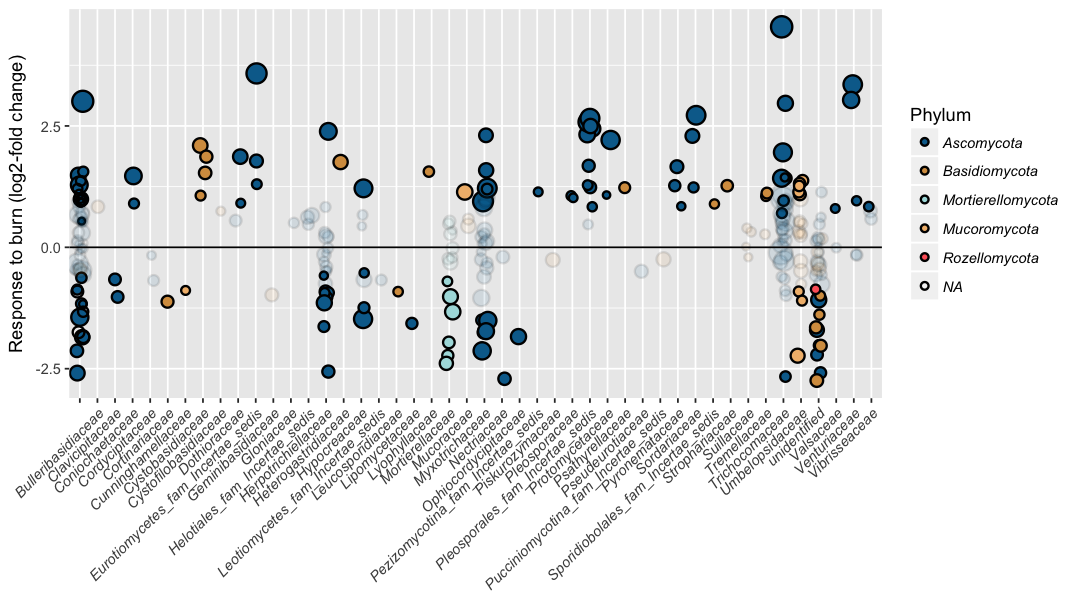

In [145]:
options(repr.plot.width=9, repr.plot.height=5)

FullResults = results%>%
    filter(!is.na(OTU))%>%
    arrange(Phylum)

nTax =500
# Ordering factor by most abundant phyla
TaxOrder = FullResults%>%
    group_by(Family)%>%
    summarize(TotalOTUs=n())
TaxOrder = TaxOrder$Family
FullResults$Family = ordered(FullResults$Family, levels=TaxOrder)

p = ggplot(FullResults[FullResults$Family %in% TaxOrder[1:nTax],],aes(x=Family, y=logFC, alpha=sigSeverity, fill=Phylum))
p = p + geom_jitter(shape=21, stroke=1, aes(size=AveExpr), width=0.2)
p = p + scale_size(guide=FALSE)
p = p + scale_alpha(guide=FALSE)
p = p + theme(axis.text.x = element_text(angle=45, hjust=1))
p = p + scale_fill_manual(values=c(wes_palette("Darjeeling2")[2:4],wes_palette("GrandBudapest"),wes_palette("GrandBudapest"),wes_palette("GrandBudapest")))
#p = p + facet_wrap(~Phylum,scales="free_x")
#p = p + theme(legend.position="none")
p = p + geom_hline(yintercept=0) 
p = p + ylab("Response to burn (log2-fold change)")
p = p + theme(axis.text.x = element_text(face="italic"),
             legend.text = element_text(face="italic"),
             axis.title.x = element_blank())
p

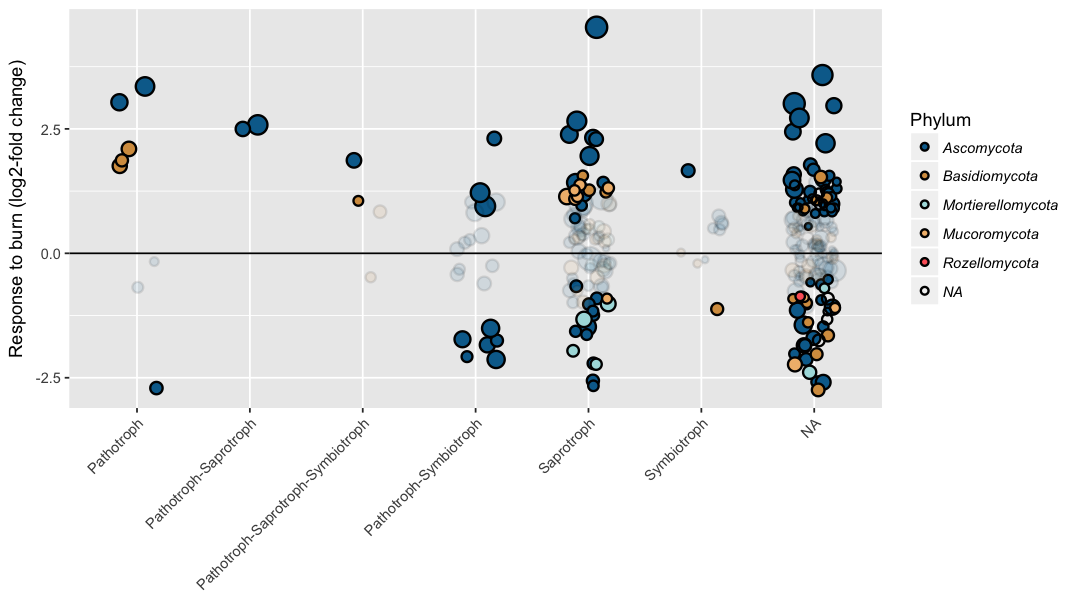

In [149]:
options(repr.plot.width=9, repr.plot.height=5)

FullResults = results%>%
    filter(!is.na(OTU))%>%
    arrange(Phylum)



p = ggplot(FullResults,aes(x=Trophic.Mode, y=logFC, alpha=sigSeverity, fill=Phylum))
p = p + geom_jitter(shape=21, stroke=1, aes(size=AveExpr), width=0.2)
p = p + scale_size(guide=FALSE)
p = p + scale_alpha(guide=FALSE)
p = p + theme(axis.text.x = element_text(angle=45, hjust=1))
p = p + scale_fill_manual(values=c(wes_palette("Darjeeling2")[2:4],wes_palette("GrandBudapest"),wes_palette("GrandBudapest"),wes_palette("GrandBudapest")))
#p = p + facet_wrap(~Phylum,scales="free_x")
#p = p + theme(legend.position="none")
p = p + geom_hline(yintercept=0) 
p = p + ylab("Response to burn (log2-fold change)")
p = p + theme(
             legend.text = element_text(face="italic"),
             axis.title.x = element_blank())
p

In [150]:
df.merged = df.merged%>%
    group_by(OTU,Veg_Comm,Burned_Unburned,Severity_Class,Trophic.Mode,Guild,Responder,Phylum,Class,Order,Family,Genus,Species)%>%
    summarize(MeanAbundance=mean(Abundance))
# Want to plot the average abundance of a given taxon.
# So, to summarize by OTU, I guess.

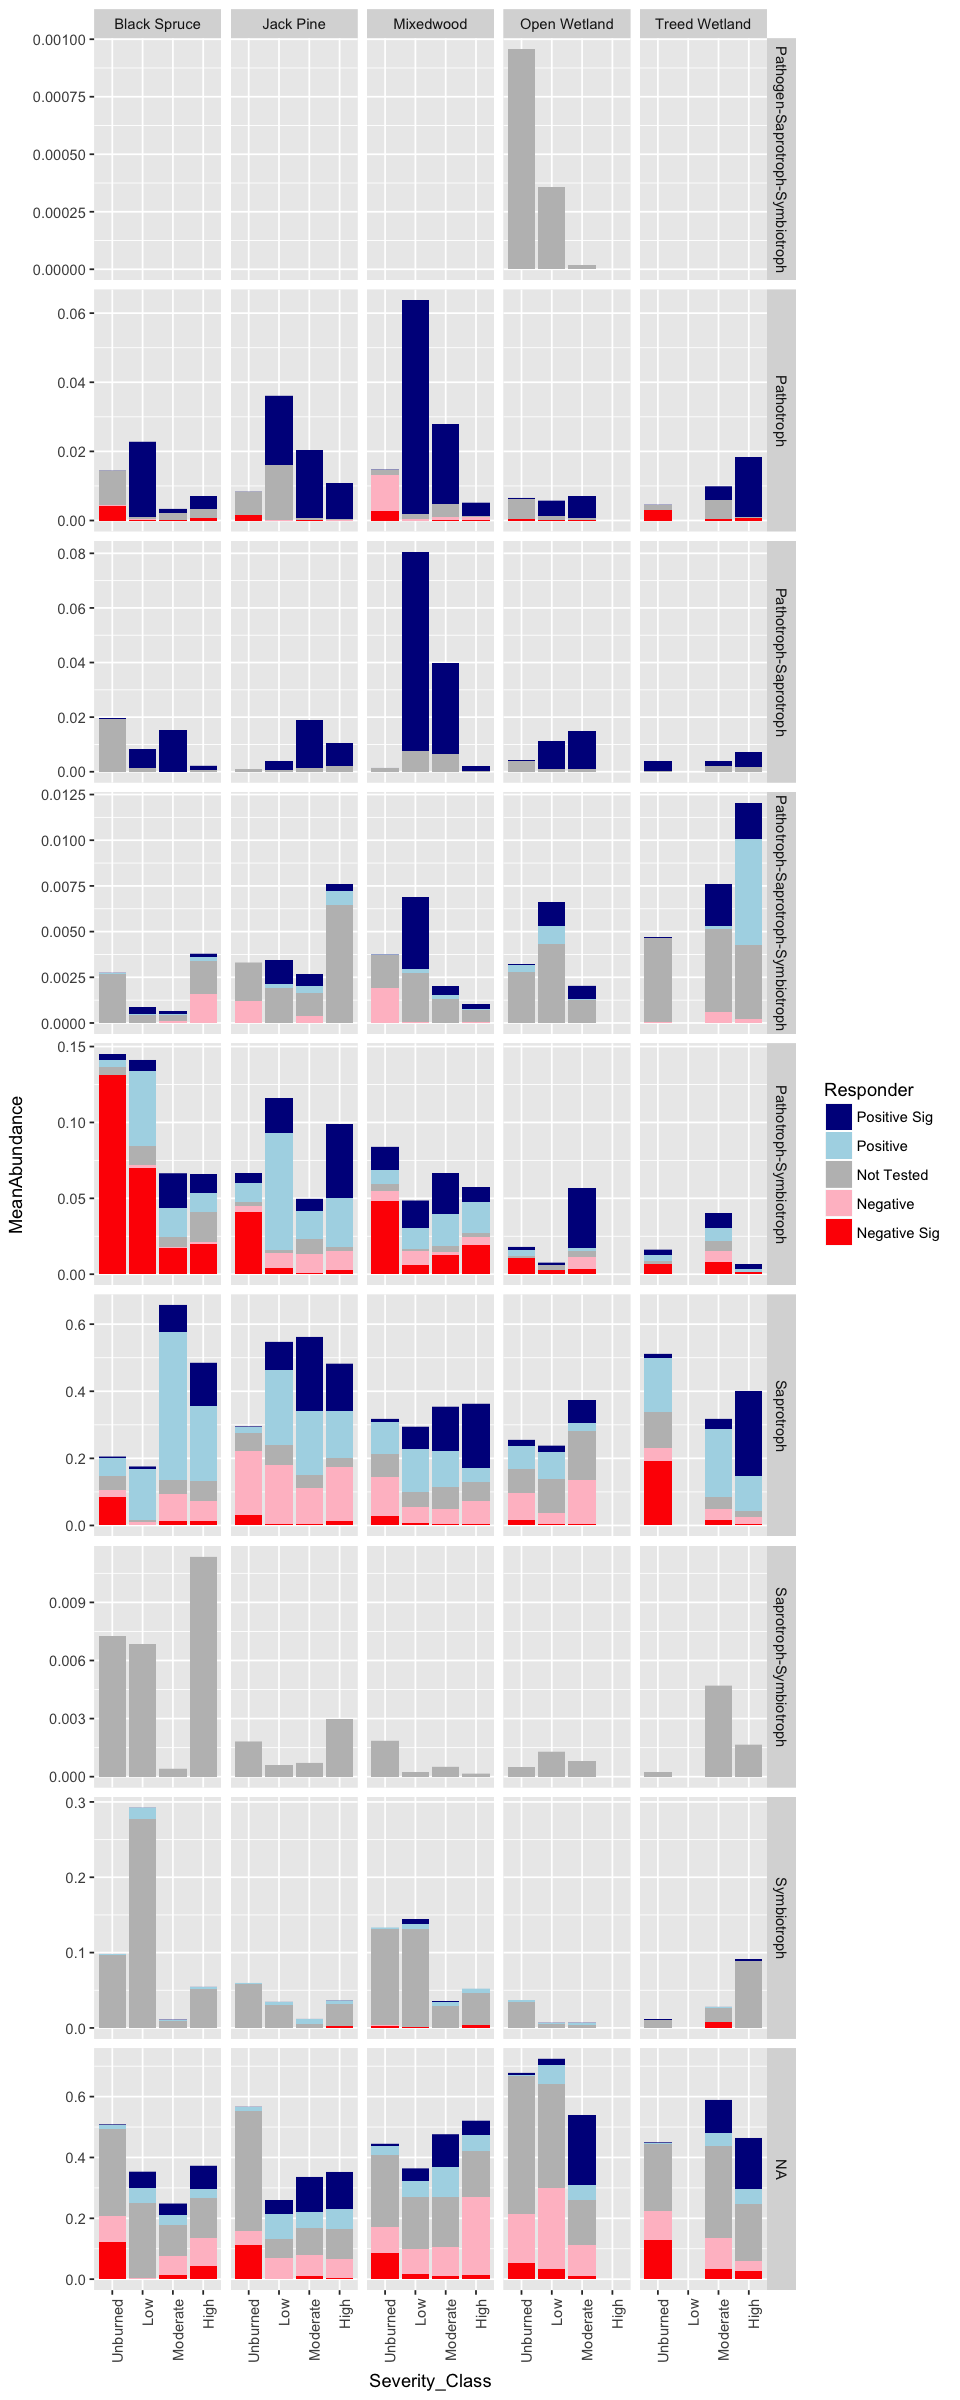

In [158]:
options(repr.plot.width=8, repr.plot.height=20)
df.plot = df.merged%>%
    group_by(Veg_Comm, Trophic.Mode)%>%
    filter(sum(MeanAbundance)>0.001)#%>%
    #filter(Burned_Unburned == "Burned")

p = ggplot(df.plot, aes(x=Severity_Class, y=MeanAbundance, fill=Responder))
#p = p +  geom_col(position="fill")
p = p +  geom_col()
p = p + scale_fill_manual(values=c("darkblue","lightblue","grey","pink","red"))
p = p + theme(axis.text.x = element_text(angle = 90, hjust=1))
#p = p + geom_abline(slope=0,intercept=0.5)
p = p + facet_grid(~Trophic.Mode~Veg_Comm,labeller = label_wrap_gen(),scales="free_y")
p
# This figure shows the mean relative abundance of all taxa, coloured by whether of not they were identified as
# general responders. I think it is interesting to see that, of the Saprotrophs, they tended to be 
# positively associated with fire severity. Most symbiotrophs were not abundant enough to be tested - 
# could play around with adjusting parameters to get more Ectos through the pipeline.


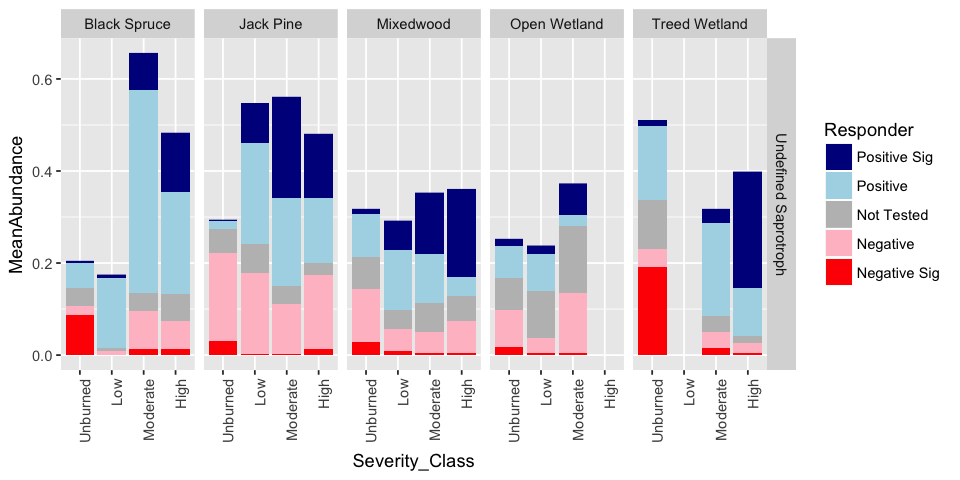

In [157]:
options(repr.plot.width=8, repr.plot.height=4)
df.plot = df.merged%>%
    group_by(Veg_Comm, Guild)%>%
    filter(sum(MeanAbundance)>0.001)%>%
    filter(Guild == "Undefined Saprotroph")

p = ggplot(df.plot, aes(x=Severity_Class, y=MeanAbundance, fill=Responder))
#p = p +  geom_col(position="fill")
p = p +  geom_col()
p = p + scale_fill_manual(values=c("darkblue","lightblue","grey","pink","red"))
p = p + theme(axis.text.x = element_text(angle = 90, hjust=1))
#p = p + geom_abline(slope=0,intercept=0.5)
p = p + facet_grid(~Guild~Veg_Comm,labeller = label_wrap_gen(),scales="free_y")
p
# This figure shows the mean relative abundance of all taxa, coloured by whether of not they were identified as
# general responders. I think it is interesting to see that, of the Saprotrophs, they tended to be 
# positively associated with fire severity. Most symbiotrophs were not abundant enough to be tested - 
# could play around with adjusting parameters to get more Ectos through the pipeline.


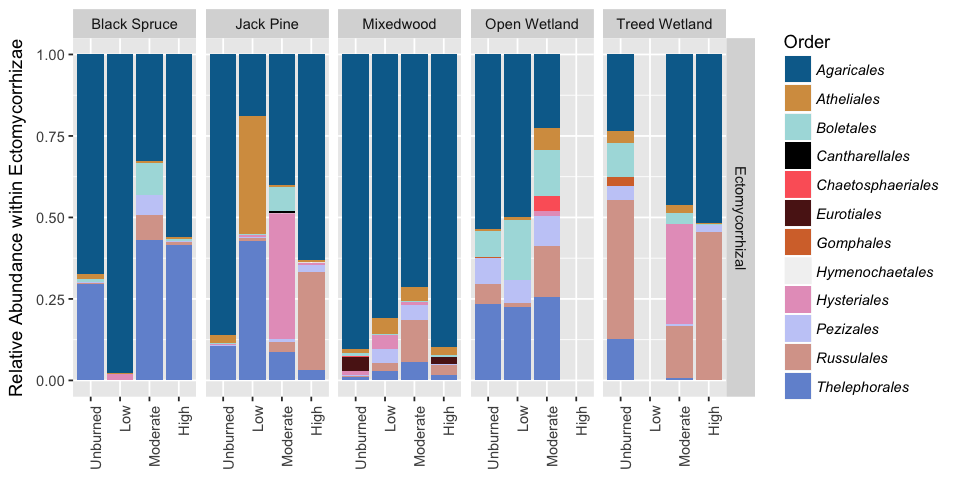

In [192]:
options(repr.plot.width=8, repr.plot.height=4)
df.plot = df.merged%>%
    group_by(Veg_Comm, Guild)%>%
    filter(sum(MeanAbundance)>0.001)%>%
    #filter(Guild %in% c('Ectomycorrhizal' ,'Ectomycorrhizal-Endophyte-Ericoid Mycorrhizal-Litter Saprotroph-Orchid Mycorrhizal', 'Ectomycorrhizal-Lichen Parasite-Lichenized-Plant Pathogen' ,'Ectomycorrhizal-Orchid Mycorrhizal-Root Associated Biotroph', 'Ectomycorrhizal-Undefined Saprotroph' ,'Ectomycorrhizal-Wood Saprotroph'))
    filter(Guild %in% c('Ectomycorrhizal'))%>%
    group_by(Veg_Comm,Severity_Class)%>%
    mutate(Relabund=MeanAbundance/sum(MeanAbundance))

p = ggplot(df.plot, aes(x=Severity_Class, y=Relabund, fill=Order))
#p = p +  geom_col(position="fill")
p = p +  geom_col()
#p = p + scale_fill_manual(values=c("darkblue","lightblue","grey","pink","red"))
p = p + scale_fill_manual(values=c(wes_palette("Darjeeling2")[2:5],wes_palette("GrandBudapest")[2:5],wes_palette("GrandBudapest2"),wes_palette("GrandBudapest")))
p = p + theme(axis.text.x = element_text(angle = 90, hjust=1))
#p = p + geom_abline(slope=0,intercept=0.5)
p = p + facet_grid(~Guild~Veg_Comm,labeller = label_wrap_gen(),scales="free_y")
p = p + ylab("Relative Abundance within Ectomycorrhizae")
p = p + theme(
             legend.text = element_text(face="italic"),
             axis.title.x = element_blank())
p
# This figure shows the mean relative abundance of all taxa, coloured by whether of not they were identified as
# general responders. I think it is interesting to see that, of the Saprotrophs, they tended to be 
# positively associated with fire severity. Most symbiotrophs were not abundant enough to be tested - 
# could play around with adjusting parameters to get more Ectos through the pipeline.

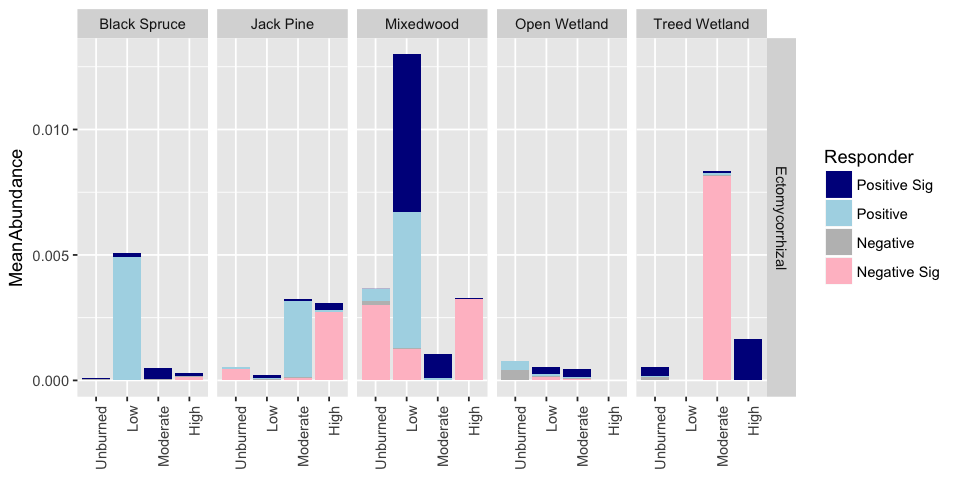

In [197]:
options(repr.plot.width=8, repr.plot.height=4)
df.plot = df.merged%>%
    group_by(Veg_Comm, Guild)%>%
    filter(sum(MeanAbundance)>0.001)%>%
    #filter(Guild %in% c('Ectomycorrhizal' ,'Ectomycorrhizal-Endophyte-Ericoid Mycorrhizal-Litter Saprotroph-Orchid Mycorrhizal', 'Ectomycorrhizal-Lichen Parasite-Lichenized-Plant Pathogen' ,'Ectomycorrhizal-Orchid Mycorrhizal-Root Associated Biotroph', 'Ectomycorrhizal-Undefined Saprotroph' ,'Ectomycorrhizal-Wood Saprotroph'))
    filter(Guild %in% c('Ectomycorrhizal'))%>%
    filter(Responder != "Not Tested")

p = ggplot(df.plot, aes(x=Severity_Class, y=MeanAbundance, fill=Responder))
#p = p +  geom_col(position="fill")
p = p +  geom_col()
p = p + scale_fill_manual(values=c("darkblue","lightblue","grey","pink","red"))
#p = p + scale_fill_manual(values=c(wes_palette("Darjeeling2")[2:5],wes_palette("GrandBudapest")[2:5],wes_palette("GrandBudapest2"),wes_palette("GrandBudapest")))
p = p + theme(axis.text.x = element_text(angle = 90, hjust=1))
#p = p + geom_abline(slope=0,intercept=0.5)
p = p + facet_grid(~Guild~Veg_Comm,labeller = label_wrap_gen(),scales="free_y")
p = p + theme(axis.title.x = element_blank())
p
# This figure shows the mean relative abundance of all taxa, coloured by whether of not they were identified as
# general responders. I think it is interesting to see that, of the Saprotrophs, they tended to be 
# positively associated with fire severity. Most symbiotrophs were not abundant enough to be tested - 
# could play around with adjusting parameters to get more Ectos through the pipeline.

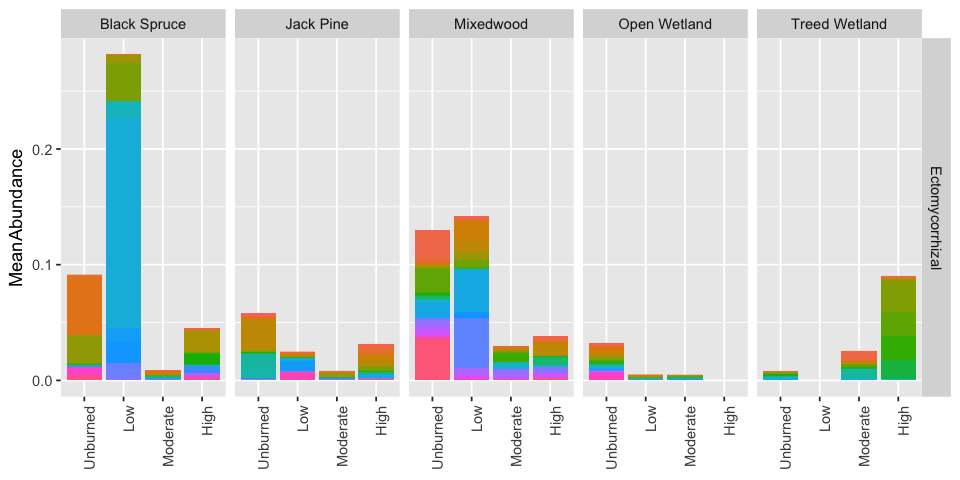

In [209]:
options(repr.plot.width=8, repr.plot.height=4)
df.plot = df.merged%>%
    group_by(Veg_Comm, Guild)%>%
    filter(sum(MeanAbundance)>0.001)%>%
    #filter(Guild %in% c('Ectomycorrhizal' ,'Ectomycorrhizal-Endophyte-Ericoid Mycorrhizal-Litter Saprotroph-Orchid Mycorrhizal', 'Ectomycorrhizal-Lichen Parasite-Lichenized-Plant Pathogen' ,'Ectomycorrhizal-Orchid Mycorrhizal-Root Associated Biotroph', 'Ectomycorrhizal-Undefined Saprotroph' ,'Ectomycorrhizal-Wood Saprotroph'))
    filter(Guild %in% c('Ectomycorrhizal'))

p = ggplot(df.plot, aes(x=Severity_Class, y=MeanAbundance, fill=OTU))
#p = p +  geom_col(position="fill")
p = p +  geom_col()
#p = p + scale_fill_manual(values=c("darkblue","lightblue","grey","pink","red"))
#p = p + scale_fill_manual(values=c(wes_palette("Darjeeling2")[2:5],wes_palette("GrandBudapest")[2:5],wes_palette("GrandBudapest2"),wes_palette("GrandBudapest")))
p = p + theme(axis.text.x = element_text(angle = 90, hjust=1))
#p = p + geom_abline(slope=0,intercept=0.5)
p = p + facet_grid(~Guild~Veg_Comm,labeller = label_wrap_gen(),scales="free_y")
p = p + theme(axis.title.x = element_blank())
p = p + guides(fill=FALSE)
p
# This figure shows the mean relative abundance of all taxa, coloured by whether of not they were identified as
# general responders. I think it is interesting to see that, of the Saprotrophs, they tended to be 
# positively associated with fire severity. Most symbiotrophs were not abundant enough to be tested - 
# could play around with adjusting parameters to get more Ectos through the pipeline.

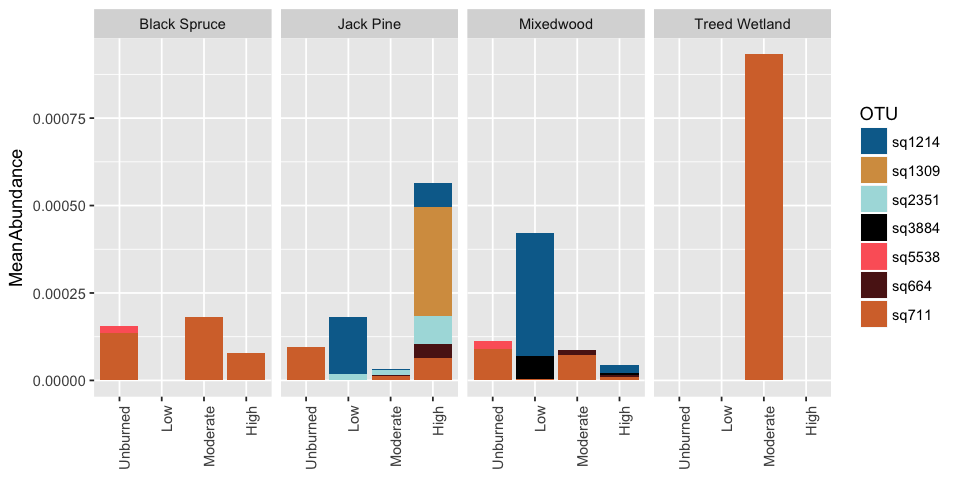

In [204]:
options(repr.plot.width=8, repr.plot.height=4)
df.plot = df.merged%>%
    filter(Family %in% c('Morchellaceae'))%>%
    filter(Veg_Comm!="Open Wetland")

p = ggplot(df.plot, aes(x=Severity_Class, y=MeanAbundance, fill=OTU))
#p = p +  geom_col(position="fill")
p = p +  geom_col()
#p = p + scale_fill_manual(values=c("darkblue","lightblue","grey","pink","red"))
p = p + scale_fill_manual(values=c(wes_palette("Darjeeling2")[2:5],wes_palette("GrandBudapest")[2:5],wes_palette("GrandBudapest2"),wes_palette("GrandBudapest")))
p = p + theme(axis.text.x = element_text(angle = 90, hjust=1))
#p = p + geom_abline(slope=0,intercept=0.5)
p = p + facet_grid(~Veg_Comm,labeller = label_wrap_gen(),scales="free_y")
p = p + theme(axis.title.x = element_blank())
p
# This figure shows the mean relative abundance of all taxa, coloured by whether of not they were identified as
# general responders. I think it is interesting to see that, of the Saprotrophs, they tended to be 
# positively associated with fire severity. Most symbiotrophs were not abundant enough to be tested - 
# could play around with adjusting parameters to get more Ectos through the pipeline.

In [171]:
levels(df.merged$Guild)

[1] "Animal Endosymbiont-Undefined Saprotroph"                                                  
 [2] "Animal Pathogen"                                                                           
 [3] "Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite"                                
 [4] "Animal Pathogen-Dung Saprotroph-Endophyte-Plant Pathogen-Undefined Saprotroph"             
 [5] "Animal Pathogen-Dung Saprotroph-Endophyte-Plant Saprotroph-Soil Saprotroph-Wood Saprotroph"
 [6] "Animal Pathogen-Endophyte-Epiphyte-Plant Pathogen-Undefined Saprotroph"                    
 [7] "Animal Pathogen-Endophyte-Fungal Parasite-Plant Pathogen-Wood Saprotroph"                  
 [8] "Animal Pathogen-Endophyte-Plant Pathogen-Wood Saprotroph"                                  
 [9] "Animal Pathogen-Plant Pathogen-Soil Saprotroph-Undefined Saprotroph"                       
[10] "Animal Pathogen-Soil Saprotroph"                                                           
[11] "Animal Pathogen-Undefined Saprotroph"                                                      
[12] "Arbuscular Mycorrhizal"                                                                    
[13] "Bryophyte Parasite-Leaf Saprotroph-Soil Saprotroph-Undefined Saprotroph-Wood Saprotroph"   
[14] "Bryophyte Parasite-Leaf Saprotroph-Wood Saprotroph"                                        
[15] "Bryophyte Parasite-Undefined Saprotroph"                                                   
[16] "Dung Saprotroph"                                                                           
[17] "Dung Saprotroph-Ectomycorrhizal"                                                           
[18] "Dung Saprotroph-Endophyte-Litter Saprotroph-Undefined Saprotroph"                          
[19] "Dung Saprotroph-Endophyte-Wood Saprotroph"                                                 
[20] "Dung Saprotroph-Undefined Saprotroph"                                                      
[21] "Ectomycorrhizal"                                                                           
[22] "Ectomycorrhizal-Endophyte-Ericoid Mycorrhizal-Litter Saprotroph-Orchid Mycorrhizal"        
[23] "Ectomycorrhizal-Lichen Parasite-Lichenized-Plant Pathogen"                                 
[24] "Ectomycorrhizal-Orchid Mycorrhizal-Root Associated Biotroph"                               
[25] "Ectomycorrhizal-Undefined Saprotroph"                                                      
[26] "Ectomycorrhizal-Wood Saprotroph"                                                           
[27] "Endophyte"                                                                                 
[28] "Endophyte-Litter Saprotroph-Wood Saprotroph"                                               
[29] "Endophyte-Plant Pathogen"                                                                  
[30] "Endophyte-Plant Pathogen-Wood Saprotroph"                                                  
[31] "Endophyte-Plant Saprotroph"                                                                
[32] "Epiphyte-Leaf Saprotroph-Lichen Parasite-Lichenized-Plant Pathogen-Wood Saprotroph"        
[33] "Ericoid Mycorrhizal"                                                                       
[34] "Fungal Parasite"                                                                           
[35] "Fungal Parasite-Litter Saprotroph"                                                         
[36] "Fungal Parasite-Undefined Saprotroph"                                                      
[37] "Leaf Saprotroph"                                                                           
[38] "Leaf Saprotroph-Plant Pathogen-Undefined Saprotroph-Wood Saprotroph"                       
[39] "Lichen Parasite"                                                                           
[40] "Lichenized"                                                                                
[41] "NULL"                                                                      

In [172]:
APCEFP = df.merged[df.merged$Guild=="Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite" & !is.na(df.merged$Guild),]
APCEFP = APCEFP[APCEFP$Responder=="Negative Sig",]
levels(as.factor(APCEFP$OTU))
APCEFP = APCEFP%>%
    arrange(-MeanAbundance)
APCEFP
#All sq130 - Tolypocladium - includes parasites of fungi, insects, rotifers, but also soil-inhabiting c unk role
# Matches T. inflatum or T. sinense 100% coverage and ID in UNITE
# Tolypocladium inflatum is an ascomycete fungus originally isolated from a Norwegian 
# soil sample that, under certain conditions, produces the immunosuppressant drug ciclosporin.
# In its sexual stage (teleomorph) it is a parasite on scarab beetles. It forms a small, 
# compound ascocarp that arises from the cadaver of its host beetle. In its asexual stage (anamorph) 
# it is a white mold that grows on soil. It is much more commonly found in its asexual stage and this 
# is the stage that was originally given the name Tolypocladium inflatum.
# Common in northern cold soils;  Tolypocladium found in peaty soils : http://www.sciencedirect.com.ezproxy.library.wisc.edu/science/article/pii/S1340354013001484?via%3Dihub

[1] "sq130"

OTU   Veg_Comm      Burned_Unburned Severity_Class Trophic.Mode          
1  sq130 Mixedwood     Unburned        Unburned       Pathotroph-Symbiotroph
2  sq130 Jack Pine     Unburned        Unburned       Pathotroph-Symbiotroph
3  sq130 Black Spruce  Unburned        Unburned       Pathotroph-Symbiotroph
4  sq130 Mixedwood     Burned          Low            Pathotroph-Symbiotroph
5  sq130 Jack Pine     Burned          High           Pathotroph-Symbiotroph
6  sq130 Mixedwood     Burned          High           Pathotroph-Symbiotroph
7  sq130 Jack Pine     Burned          Low            Pathotroph-Symbiotroph
8  sq130 Mixedwood     Burned          Moderate       Pathotroph-Symbiotroph
9  sq130 Open Wetland  Burned          Low            Pathotroph-Symbiotroph
10 sq130 Black Spruce  Burned          Moderate       Pathotroph-Symbiotroph
11 sq130 Treed Wetland Burned          Moderate       Pathotroph-Symbiotroph
12 sq130 Black Spruce  Burned          High           Pathotroph-Symbiotroph
13 sq130 Open Wetland  Unburned        Unburned       Pathotroph-Symbiotroph
14 sq130 Treed Wetland Unburned        Unburned       Pathotroph-Symbiotroph
15 sq130 Treed Wetland Burned          High           Pathotroph-Symbiotroph
16 sq130 Black Spruce  Burned          Low            Pathotroph-Symbiotroph
17 sq130 Jack Pine     Burned          Moderate       Pathotroph-Symbiotroph
18 sq130 Open Wetland  Burned          Moderate       Pathotroph-Symbiotroph
   Guild                                                      Responder   
1  Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
2  Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
3  Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
4  Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
5  Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
6  Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
7  Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
8  Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
9  Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
10 Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
11 Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
12 Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
13 Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
14 Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
15 Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
16 Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
17 Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
18 Animal Pathogen-Clavicipitaceous Endophyte-Fungal Parasite Negative Sig
   Phylum     Class           Order       Family               Genus        
1  Ascomycota Sordariomycetes Hypocreales Ophiocordycipitaceae Tolypocladium
2  Ascomycota Sordariomycetes Hypocreales Ophiocordycipitaceae Tolypocladium
3  Ascomycota Sordariomycetes Hypocreales Ophiocordycipitaceae Tolypocladium
4  Ascomycota Sordariomycetes Hypocreales Ophiocordycipitaceae Tolypocladium
5  Ascomycota Sordariomycetes Hypocreales Ophiocordycipitaceae Tolypocladium
6  Ascomycota Sordariomycetes Hypocreales Ophiocordycipitaceae Tolypocladium
7  Ascomycota Sordariomycetes Hypocreales Ophiocordycipitaceae Tolypocladium
8  Ascomycota Sordariomycetes Hypocreales Ophiocordycipitaceae Tolypocladium
9  Ascomycota Sordariomycetes Hypocreales Ophiocordycipitaceae Tolypocladium
10 Ascomycota Sordariomycetes Hypocreales Ophiocordycipitaceae Tolypocladium
11 Ascomycota Sordariomycetes Hypocreales Ophiocordycipitaceae Tolypocladium
12 Ascomycota Sordariomycetes Hypocreales Ophiocordycipitaceae Tolypocladium
13 Ascomycota Sordariomycetes Hypocreales Ophiocordycipitaceae Tolypocladium
14 Ascomycota Sordariomycetes Hypocre

In [170]:
FungParasite = df.merged[df.merged$Guild=="Fungal Parasite" & !is.na(df.merged$Guild),]
FungParasite = FungParasite[FungParasite$Responder=="Positive Sig",]
levels(as.factor(FungParasite$OTU))
FungParasite = FungParasite%>%
    arrange(-MeanAbundance)
FungParasite
# All sq126 (Colacogloea terpenoidalis) - 100% match, 100% coverage - assoc. with terpenoids... makes sense c fire
# Can consume hexadecane and propane 1,2-diol - may or may not be mycoparasitic
    # (https://academic.oup.com/femsyr/article-lookup/doi/10.1016/j.femsyr.2004.05.002)
    # During a search for yeasts that hydroxylate monoterpenes, four yeast strains were isolated from soil and 
    # plant residue in monoterpene-rich environments using enrichment techniques with cyclohexanedioic acid or 
    # cyclohexanedimethanol as sole carbon source. These strains were able to utilize (+)-limonene supplied as a 
    # vapor as only carbon source. (prev/also Rhodotorula terpenoidalis?)
# and sq236 (Cystobasidium pinicola) - enriched in litter vs. soil (https://academic-oup-com.ezproxy.library.wisc.edu/femsec/article/93/2/fiw223/2617552/Drivers-of-yeast-community-composition-in-the)

[1] "sq126" "sq236"

OTU   Veg_Comm      Burned_Unburned Severity_Class Trophic.Mode
1  sq126 Treed Wetland Burned          High           Pathotroph  
2  sq126 Open Wetland  Burned          Low            Pathotroph  
3  sq126 Jack Pine     Burned          High           Pathotroph  
4  sq236 Jack Pine     Burned          Moderate       Pathotroph  
5  sq126 Jack Pine     Burned          Moderate       Pathotroph  
6  sq126 Jack Pine     Burned          Low            Pathotroph  
7  sq236 Black Spruce  Burned          High           Pathotroph  
8  sq236 Jack Pine     Burned          Low            Pathotroph  
9  sq236 Mixedwood     Burned          High           Pathotroph  
10 sq236 Mixedwood     Burned          Moderate       Pathotroph  
11 sq236 Treed Wetland Burned          High           Pathotroph  
12 sq126 Mixedwood     Burned          Moderate       Pathotroph  
13 sq236 Treed Wetland Burned          Moderate       Pathotroph  
14 sq126 Open Wetland  Burned          Moderate       Pathotroph  
15 sq126 Black Spruce  Burned          High           Pathotroph  
16 sq236 Mixedwood     Burned          Low            Pathotroph  
17 sq236 Open Wetland  Burned          Low            Pathotroph  
18 sq126 Mixedwood     Burned          High           Pathotroph  
19 sq236 Jack Pine     Burned          High           Pathotroph  
20 sq126 Black Spruce  Burned          Moderate       Pathotroph  
21 sq236 Black Spruce  Burned          Moderate       Pathotroph  
22 sq236 Black Spruce  Burned          Low            Pathotroph  
23 sq126 Treed Wetland Burned          Moderate       Pathotroph  
24 sq236 Open Wetland  Burned          Moderate       Pathotroph  
25 sq126 Black Spruce  Unburned        Unburned       Pathotroph  
26 sq126 Jack Pine     Unburned        Unburned       Pathotroph  
27 sq236 Mixedwood     Unburned        Unburned       Pathotroph  
28 sq126 Open Wetland  Unburned        Unburned       Pathotroph  
29 sq126 Mixedwood     Burned          Low            Pathotroph  
30 sq126 Black Spruce  Burned          Low            Pathotroph  
31 sq126 Mixedwood     Unburned        Unburned       Pathotroph  
32 sq126 Treed Wetland Unburned        Unburned       Pathotroph  
33 sq236 Black Spruce  Unburned        Unburned       Pathotroph  
34 sq236 Jack Pine     Unburned        Unburned       Pathotroph  
35 sq236 Open Wetland  Unburned        Unburned       Pathotroph  
36 sq236 Treed Wetland Unburned        Unburned       Pathotroph  
   Guild           Responder    Phylum        Class              
1  Fungal Parasite Positive Sig Basidiomycota Microbotryomycetes 
2  Fungal Parasite Positive Sig Basidiomycota Microbotryomycetes 
3  Fungal Parasite Positive Sig Basidiomycota Microbotryomycetes 
4  Fungal Parasite Positive Sig Basidiomycota Cystobasidiomycetes
5  Fungal Parasite Positive Sig Basidiomycota Microbotryomycetes 
6  Fungal Parasite Positive Sig Basidiomycota Microbotryomycetes 
7  Fungal Parasite Positive Sig Basidiomycota Cystobasidiomycetes
8  Fungal Parasite Positive Sig Basidiomycota Cystobasidiomycetes
9  Fungal Parasite Positive Sig Basidiomycota Cystobasidiomycetes
10 Fungal Parasite Positive Sig Basidiomycota Cystobasidiomycetes
11 Fungal Parasite Positive Sig Basidiomycota Cystobasidiomycetes
12 Fungal Parasite Positive Sig Basidiomycota Microbotryomycetes 
13 Fungal Parasite Positive Sig Basidiomycota Cystobasidiomycetes
14 Fungal Parasite Positive Sig Basidiomycota Microbotryomycetes 
15 Fungal Parasite Positive Sig Basidiomycota Microbotryomycetes 
16 Fungal Parasite Positive Sig Basidiomycota Cystobasidiomycetes
17 Fungal Parasite Positive Sig Basidiomycota Cystobasidiomycetes
18 Fungal Parasite Positive Sig Basidiomycota Microbotryomycetes 
19 Fungal Parasite Positive Sig Basidiomycota Cystobasidiomycetes
20 Fungal Parasite Positive Sig Basidiomycota Microbotryomycetes 
21 Fungal Parasite Positive Sig Basidiomycota Cystobasidiomycetes
22 Fungal Parasite Positive Sig Basidiomycota Cystobasidiomycetes
23 Fun

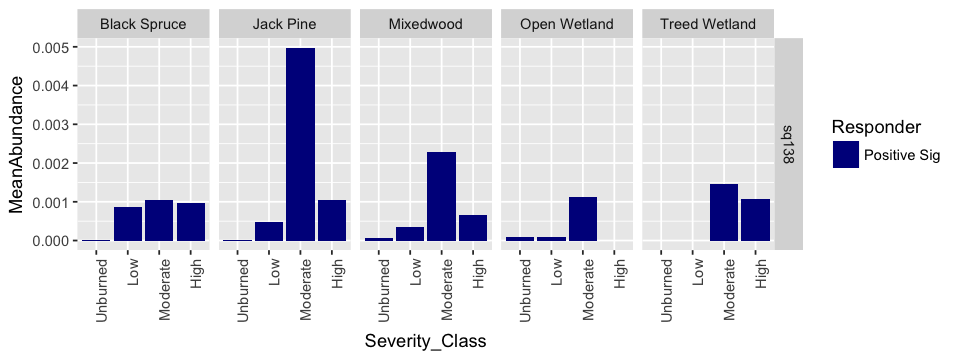

In [169]:
options(repr.plot.width=8, repr.plot.height=3)

d.plot = Exophiala%>%
    filter(OTU=="sq138")

p = ggplot(d.plot, aes(x=Severity_Class, y=MeanAbundance, fill=Responder))
#p = p +  geom_col(position="fill")
p = p +  geom_col()
p = p + scale_fill_manual(values=c("darkblue","lightblue","grey","pink","red"))
p = p + theme(axis.text.x = element_text(angle = 90, hjust=1))
#p = p + geom_abline(slope=0,intercept=0.5)
p = p + facet_grid(~OTU~Veg_Comm,labeller = label_wrap_gen(),scales="free_y")
p
# sq138, likely Exophiala xenobiotica, is very convincing, even though <1% of total comm at max. Still.

In [160]:
SaproEnrich = df.merged[df.merged$Guild=="Undefined Saprotroph" & !is.na(df.merged$Guild),]
SaproEnrich = SaproEnrich[SaproEnrich$Responder=="Positive Sig",]
levels(as.factor(SaproEnrich$OTU))
SaproEnrich = SaproEnrich%>%
    arrange(-MeanAbundance)
SaproEnrich
# It's all the Penicilliums
# sp3 matches Penicillium velutinum
# sq10 matches Penicillium griseofulvum, Penicillium samsonianum, and Penicillium dipodomyicola   
# Some are also Ochrocladosporium - looks a bit like frigidarii or elatum (97% ID)
# Also see sq105 Umbelopsis vinacea - multi-spored vs. near relatives - may be more of r-selected org?
# Some 276 Scutellinia - saprophytic; in Pyronema
# sq138 looks like Exophiala xenobiotica: Environmental strains of E. xenobiotica are frequently found 
# in habitats rich in monoaromatic hydrocarbons and alkanes! (https://dx.doi.org/10.1007/s10482-006-9080-z)

[1] "sq10"  "sq105" "sq112" "sq137" "sq138" "sq14"  "sq235" "sq244" "sq276"
[10] "sq3"   "sq363" "sq417" "sq494" "sq579" "sq584"

OTU   Veg_Comm      Burned_Unburned Severity_Class Trophic.Mode
1   sq10  Treed Wetland Burned          High           Saprotroph  
2   sq3   Black Spruce  Burned          High           Saprotroph  
3   sq3   Treed Wetland Burned          High           Saprotroph  
4   sq3   Mixedwood     Burned          High           Saprotroph  
5   sq3   Mixedwood     Burned          Moderate       Saprotroph  
6   sq3   Jack Pine     Burned          Moderate       Saprotroph  
7   sq3   Jack Pine     Burned          High           Saprotroph  
8   sq10  Mixedwood     Burned          High           Saprotroph  
9   sq3   Jack Pine     Burned          Low            Saprotroph  
10  sq14  Open Wetland  Burned          Moderate       Saprotroph  
11  sq3   Mixedwood     Burned          Low            Saprotroph  
12  sq14  Jack Pine     Burned          High           Saprotroph  
13  sq10  Jack Pine     Burned          Moderate       Saprotroph  
14  sq3   Black Spruce  Burned          Moderate       Saprotroph  
15  sq14  Jack Pine     Burned          Moderate       Saprotroph  
16  sq10  Jack Pine     Burned          High           Saprotroph  
17  sq3   Treed Wetland Burned          Moderate       Saprotroph  
18  sq14  Treed Wetland Burned          High           Saprotroph  
19  sq10  Treed Wetland Burned          Moderate       Saprotroph  
20  sq105 Open Wetland  Burned          Moderate       Saprotroph  
21  sq14  Jack Pine     Burned          Low            Saprotroph  
22  sq3   Mixedwood     Unburned        Unburned       Saprotroph  
23  sq10  Open Wetland  Burned          Low            Saprotroph  
24  sq14  Black Spruce  Burned          Moderate       Saprotroph  
25  sq3   Open Wetland  Burned          Low            Saprotroph  
26  sq14  Mixedwood     Burned          Moderate       Saprotroph  
27  sq138 Jack Pine     Burned          Moderate       Saprotroph  
28  sq14  Black Spruce  Burned          High           Saprotroph  
29  sq105 Jack Pine     Burned          Moderate       Saprotroph  
30  sq10  Mixedwood     Burned          Low            Saprotroph  
⋮   ⋮     ⋮             ⋮               ⋮              ⋮           
241 sq276 Black Spruce  Unburned        Unburned       Saprotroph  
242 sq276 Jack Pine     Unburned        Unburned       Saprotroph  
243 sq276 Open Wetland  Burned          Moderate       Saprotroph  
244 sq276 Open Wetland  Unburned        Unburned       Saprotroph  
245 sq276 Treed Wetland Unburned        Unburned       Saprotroph  
246 sq3   Jack Pine     Unburned        Unburned       Saprotroph  
247 sq363 Black Spruce  Burned          Low            Saprotroph  
248 sq363 Black Spruce  Unburned        Unburned       Saprotroph  
249 sq363 Open Wetland  Burned          Low            Saprotroph  
250 sq363 Open Wetland  Unburned        Unburned       Saprotroph  
251 sq363 Treed Wetland Unburned        Unburned       Saprotroph  
252 sq417 Black Spruce  Burned          Low            Saprotroph  
253 sq417 Jack Pine     Burned          Low            Saprotroph  
254 sq417 Jack Pine     Unburned        Unburned       Saprotroph  
255 sq417 Open Wetland  Burned          Low            Saprotroph  
256 sq417 Open Wetland  Burned          Moderate       Saprotroph  
257 sq417 Treed Wetland Burned          High           Saprotroph  
258 sq417 Treed Wetland Unburned        Unburned       Saprotroph  
259 sq494 Jack Pine     Unburned        Unburned       Saprotroph  
260 sq494 Mixedwood     Burned          Low            Saprotroph  
261 sq494 Mixedwood     Burned          High           Saprotroph  
262 sq494 Open Wetland  Burned          Moderate       Saprotroph  
263 sq494 Treed Wetland Unburned        Unburned       Saprotroph  
264 sq579 Black Spruce  Burned          Low            Saprotroph  
265 sq579 Black Spruce  Unburned        Unburned       Saprotroph  
266 sq579 Treed Wetland Unburned        Unburned       Saprotroph  
267 sq584 Black Spruce  Burned          Low            Sapro

In [ ]:
SaproEnrich = df.merged[df.merged$Guild=="Fungal Pathogen" & !is.na(df.merged$Guild),]
SaproEnrich = SaproEnrich[SaproEnrich$Responder=="Positive Sig",]
levels(as.factor(SaproEnrich$OTU))
SaproEnrich = SaproEnrich%>%
    arrange(-MeanAbundance)
SaproEnrich
# It's all the Penicilliums
# sp3 matches Penicillium velutinum
# sq10 matches Penicillium griseofulvum, Penicillium samsonianum, and Penicillium dipodomyicola   
# Some are also Ochrocladosporium - looks a bit like frigidarii or elatum (97% ID)
# Also see sq105 Umbelopsis vinacea - multi-spored vs. near relatives - may be more of r-selected org?
# Some 276 Scutellinia - saprophytic; in Pyronema
# sq138 looks like Exophiala xenobiotica: Environmental strains of E. xenobiotica are frequently found 
# in habitats rich in monoaromatic hydrocarbons and alkanes! (https://dx.doi.org/10.1007/s10482-006-9080-z)

In [151]:
EricoidLoss = df.merged[df.merged$Guild=="Ericoid Mycorrhizal" & !is.na(df.merged$Guild),]
EricoidLoss = EricoidLoss[EricoidLoss$Responder=="Negative Sig",]
levels(as.factor(EricoidLoss$OTU))
# The enzymatic abilities and acidophilic nature of ericoid mycorrhizal Oidiodendron species may 
# partially explain the success of their host plants in acidic nutrient-poor soils (Rice & Currah 2001, in press).
# Best NCBI match is O. rhodogenum (100% ID, 100% coverage), known to have pH optima <5
    # Only O. maius maius is confirmed ericoid.
# sq22 matches Oidiodendron pilicola from UNITE db - non ecto
# MAY NOT BE ERICOID

[1] "sq145" "sq185" "sq22"  "sq46"

In [146]:
PlantPath = df.merged[df.merged$Guild=="Plant Pathogen" & !is.na(df.merged$Guild),]
PlantPath = PlantPath[PlantPath$Responder=="Negative Sig",]
PlantPath
# Both American and English boxwood are susceptible to this disease caused by the fungus, 
# Pseudonectria rouselliana. The imperfect stage is Volutella buxi (best match for sq251 - Volutella). 
# Kills Pachysandra terminalis, Buxus sp., etc.

# This could represent a loss of boxwood or whatever its host is. Pretty dramatic.

OTU   Veg_Comm      Burned_Unburned Severity_Class Trophic.Mode
1  sq251 Black Spruce  Burned          Low            Pathotroph  
2  sq251 Black Spruce  Burned          Moderate       Pathotroph  
3  sq251 Black Spruce  Burned          High           Pathotroph  
4  sq251 Black Spruce  Unburned        Unburned       Pathotroph  
5  sq251 Jack Pine     Burned          Low            Pathotroph  
6  sq251 Jack Pine     Burned          Moderate       Pathotroph  
7  sq251 Jack Pine     Burned          High           Pathotroph  
8  sq251 Jack Pine     Unburned        Unburned       Pathotroph  
9  sq251 Mixedwood     Burned          Low            Pathotroph  
10 sq251 Mixedwood     Burned          Moderate       Pathotroph  
11 sq251 Mixedwood     Burned          High           Pathotroph  
12 sq251 Mixedwood     Unburned        Unburned       Pathotroph  
13 sq251 Open Wetland  Burned          Low            Pathotroph  
14 sq251 Open Wetland  Burned          Moderate       Pathotroph  
15 sq251 Open Wetland  Unburned        Unburned       Pathotroph  
16 sq251 Treed Wetland Burned          Moderate       Pathotroph  
17 sq251 Treed Wetland Burned          High           Pathotroph  
18 sq251 Treed Wetland Unburned        Unburned       Pathotroph  
   Guild          Responder    Phylum     Class           Order      
1  Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
2  Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
3  Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
4  Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
5  Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
6  Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
7  Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
8  Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
9  Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
10 Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
11 Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
12 Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
13 Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
14 Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
15 Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
16 Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
17 Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
18 Plant Pathogen Negative Sig Ascomycota Sordariomycetes Hypocreales
   Family      Genus     Species      MeanAbundance
1  Nectriaceae Volutella unidentified 4.923198e-05 
2  Nectriaceae Volutella unidentified 4.513654e-05 
3  Nectriaceae Volutella unidentified 5.853986e-04 
4  Nectriaceae Volutella unidentified 4.302097e-03 
5  Nectriaceae Volutella unidentified 0.000000e+00 
6  Nectriaceae Volutella unidentified 4.241458e-06 
7  Nectriaceae Volutella unidentified 1.390134e-06 
8  Nectriaceae Volutella unidentified 1.572260e-03 
9  Nectriaceae Volutella unidentified 0.000000e+00 
10 Nectriaceae Volutella unidentified 2.732794e-04 
11 Nectriaceae Volutella unidentified 2.424151e-05 
12 Nectriaceae Volutella unidentified 2.706361e-03 
13 Nectriaceae Volutella unidentified 5.521464e-05 
14 Nectriaceae Volutella unidentified 1.152377e-04 
15 Nectriaceae Volutella unidentified 3.365117e-04 
16 Nectriaceae Volutella unidentified 3.537111e-04 
17 Nectriaceae Volutella unidentified 6.423242e-04 
18 Nectriaceae Volutella unidentified 2.997040e-03

In [196]:
EctoLoss = df.merged[df.merged$Guild=="Ectomycorrhizal" & !is.na(df.merged$Guild),]
EctoLoss = EctoLoss[EctoLoss$Responder=="Negative Sig",]
levels(as.factor(EctoLoss$OTU))
EctoLoss = EctoLoss%>%
    arrange(-MeanAbundance)
EctoLoss

[1] "sq108"

OTU   Veg_Comm      Burned_Unburned Severity_Class Trophic.Mode
1  sq108 Treed Wetland Burned          Moderate       Symbiotroph 
2  sq108 Mixedwood     Burned          High           Symbiotroph 
3  sq108 Mixedwood     Unburned        Unburned       Symbiotroph 
4  sq108 Jack Pine     Burned          High           Symbiotroph 
5  sq108 Mixedwood     Burned          Low            Symbiotroph 
6  sq108 Jack Pine     Unburned        Unburned       Symbiotroph 
7  sq108 Open Wetland  Burned          Low            Symbiotroph 
8  sq108 Black Spruce  Burned          High           Symbiotroph 
9  sq108 Jack Pine     Burned          Moderate       Symbiotroph 
10 sq108 Open Wetland  Burned          Moderate       Symbiotroph 
11 sq108 Jack Pine     Burned          Low            Symbiotroph 
12 sq108 Open Wetland  Unburned        Unburned       Symbiotroph 
13 sq108 Black Spruce  Burned          Low            Symbiotroph 
14 sq108 Black Spruce  Burned          Moderate       Symbiotroph 
15 sq108 Black Spruce  Unburned        Unburned       Symbiotroph 
16 sq108 Mixedwood     Burned          Moderate       Symbiotroph 
17 sq108 Treed Wetland Burned          High           Symbiotroph 
18 sq108 Treed Wetland Unburned        Unburned       Symbiotroph 
   Guild           Responder    Phylum        Class          Order     
1  Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
2  Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
3  Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
4  Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
5  Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
6  Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
7  Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
8  Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
9  Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
10 Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
11 Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
12 Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
13 Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
14 Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
15 Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
16 Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
17 Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
18 Ectomycorrhizal Negative Sig Basidiomycota Agaricomycetes Agaricales
   Family         Genus       Species                    MeanAbundance
1  Cortinariaceae Cortinarius Cortinarius_diasemospermus 8.133940e-03 
2  Cortinariaceae Cortinarius Cortinarius_diasemospermus 3.229488e-03 
3  Cortinariaceae Cortinarius Cortinarius_diasemospermus 3.008016e-03 
4  Cortinariaceae Cortinarius Cortinarius_diasemospermus 2.712173e-03 
5  Cortinariaceae Cortinarius Cortinarius_diasemospermus 1.235894e-03 
6  Cortinariaceae Cortinarius Cortinarius_diasemospermus 4.363777e-04 
7  Cortinariaceae Cortinarius Cortinarius_diasemospermus 1.231475e-04 
8  Cortinariaceae Cortinarius Cortinarius_diasemospermus 1.174281e-04 
9  Cortinariaceae Cortinarius Cortinarius_diasemospermus 8.187406e-05 
10 Cortinariaceae Cortinarius Cortinarius_diasemospermus 4.929508e-05 
11 Cortinariaceae Cortinarius Cortinarius_diasemospermus 1.273301e-05 
12 Cortinariaceae Cortinarius Cortinarius_diasemospermus 1.220778e-05 
13 Cortinariaceae Cortinarius Cortinarius_diasemospermus 0.000000e+00 
14 Cortinariaceae Cortinarius Cortinarius_diasemospermus 0.000000e+00 
15 Cortinariaceae Cortinarius Cortinarius_diasemospermus 0.000000e+00 
16 Cortinariaceae Cortinarius Cortinarius_diasemospermus 0.000000e+00 
17 Cortinariaceae Cortinarius Cortinarius_diasemospermus 0.000000e+00 
18 Cortinariaceae Cortinarius Cortinarius_diasemospermus 0.000000e+00

In [205]:
EctoEnrich = df.merged[df.merged$Guild=="Ectomycorrhizal" & !is.na(df.merged$Guild),]
#EctoEnrich = EctoEnrich[EctoEnrich$Responder=="Positive Sig" | EctoEnrich$Responder=="Positive",]
levels(as.factor(EctoEnrich$OTU))
EctoEnrich = EctoEnrich%>%
    arrange(-MeanAbundance)
EctoEnrich

[1] "sq1004" "sq1012" "sq1014" "sq1019" "sq1030" "sq1032" "sq1039" "sq1044"
  [9] "sq1047" "sq1050" "sq106"  "sq1064" "sq1067" "sq108"  "sq1093" "sq1095"
 [17] "sq1096" "sq1101" "sq1102" "sq1116" "sq1123" "sq1141" "sq1146" "sq115" 
 [25] "sq1154" "sq1158" "sq1159" "sq1170" "sq1174" "sq1177" "sq1185" "sq120" 
 [33] "sq1200" "sq1209" "sq1217" "sq1220" "sq1221" "sq1227" "sq1228" "sq1233"
 [41] "sq1236" "sq1237" "sq1247" "sq1266" "sq1272" "sq1281" "sq1282" "sq1293"
 [49] "sq1294" "sq1308" "sq1322" "sq134"  "sq1358" "sq1377" "sq1388" "sq1402"
 [57] "sq1412" "sq1414" "sq142"  "sq1427" "sq1468" "sq1482" "sq1490" "sq1492"
 [65] "sq1503" "sq1516" "sq1518" "sq152"  "sq1521" "sq1528" "sq153"  "sq1530"
 [73] "sq154"  "sq1540" "sq1545" "sq1548" "sq1561" "sq1562" "sq1567" "sq1572"
 [81] "sq1573" "sq1579" "sq1605" "sq1614" "sq1616" "sq1627" "sq165"  "sq1676"
 [89] "sq1679" "sq1680" "sq1683" "sq1692" "sq1693" "sq1701" "sq1702" "sq1713"
 [97] "sq172"  "sq1734" "sq1739" "sq1743" "sq1745" "sq1746" "sq1750" "sq1762"
[105] "sq1786" "sq179"  "sq1791" "sq1798" "sq1816" "sq1820" "sq1831" "sq1840"
[113] "sq1865" "sq1888" "sq189"  "sq1909" "sq1915" "sq192"  "sq1929" "sq193" 
[121] "sq1931" "sq1943" "sq1945" "sq1948" "sq1952" "sq1956" "sq196"  "sq1960"
[129] "sq1972" "sq1974" "sq1979" "sq1987" "sq1994" "sq2001" "sq201"  "sq202" 
[137] "sq2024" "sq2025" "sq2028" "sq2037" "sq2042" "sq2057" "sq2060" "sq2063"
[145] "sq2065" "sq2067" "sq2091" "sq2110" "sq2121" "sq2149" "sq2151" "sq217" 
[153] "sq2175" "sq2188" "sq219"  "sq2210" "sq2213" "sq2215" "sq2221" "sq2227"
[161] "sq2228" "sq224"  "sq2243" "sq2270" "sq2282" "sq2284" "sq2285" "sq2290"
[169] "sq2297" "sq2301" "sq2323" "sq2342" "sq2350" "sq2355" "sq2369" "sq2370"
[177] "sq2382" "sq2423" "sq2447" "sq2455" "sq247"  "sq2474" "sq2493" "sq2498"
[185] "sq2504" "sq2515" "sq2517" "sq2520" "sq2521" "sq2533" "sq2534" "sq2542"
[193] "sq2552" "sq2556" "sq2558" "sq2568" "sq2578" "sq2582" "sq2584" "sq2587"
[201] "sq2594" "sq2599" "sq2610" "sq2615" "sq2639" "sq2652" "sq2654" "sq266" 
[209] "sq2665" "sq2666" "sq2674" "sq2676" "sq2686" "sq269"  "sq2713" "sq2716"
[217] "sq2721" "sq2722" "sq2724" "sq2725" "sq2730" "sq2731" "sq2753" "sq2761"
[225] "sq2764" "sq2765" "sq2780" "sq2784" "sq2812" "sq2818" "sq2846" "sq2890"
[233] "sq2895" "sq2908" "sq2927" "sq2934" "sq2946" "sq2947" "sq295"  "sq2956"
[241] "sq2958" "sq297"  "sq2991" "sq3007" "sq301"  "sq3018" "sq3031" "sq3034"
[249] "sq3039" "sq3054" "sq3059" "sq3090" "sq3111" "sq3114" "sq3127" "sq3137"
[257] "sq3139" "sq3147" "sq3158" "sq317"  "sq3183" "sq3190" "sq3191" "sq3195"
[265] "sq3218" "sq3226" "sq3232" "sq3234" "sq3242" "sq3246" "sq3257" "sq326" 
[273] "sq3261" "sq3274" "sq3281" "sq3285" "sq3288" "sq3292" "sq3294" "sq3296"
[281] "sq33"   "sq3305" "sq3324" "sq3332" "sq3335" "sq3347" "sq3349" "sq3367"
[289] "sq3378" "sq3381" "sq3386" "sq339"  "sq34"   "sq340"  "sq3403" "sq3404"
[297] "sq3405" "sq3426" "sq3432" "sq3433" "sq3434" "sq3435" "sq3442" "sq3444"
[305] "sq3455" "sq3457" "sq3480" "sq3494" "sq3536" "sq3537" "sq3544" "sq3568"
[313] "sq357"  "sq360"  "sq3601" "sq3602" "sq3605" "sq3621" "sq3624" "sq3634"
[321] "sq3641" "sq3663" "sq369"  "sq3691" "sq370"  "sq3701" "sq3705" "sq371" 
[329] "sq3716" "sq3720" "sq3726" "sq3756" "sq3766" "sq3772" "sq3785" "sq3798"
[337] "sq380"  "sq3805" "sq3820" "sq3823" "sq3825" "sq3831" "sq3838" "sq3868"
[345] "sq3874" "sq3880" "sq3891" "sq39"   "sq394"  "sq3957" "sq3970" "sq399" 
[353] "sq3996" "sq4013" "sq4021" "sq4023" "sq404"  "sq4040" "sq4068" "sq410" 
[361] "sq4107" "sq414"  "sq4140" "sq4175" "sq419"  "sq4215" "sq4216" "sq423" 
[369] "sq4238" "sq424"  "sq4242" "sq4251" "sq4259" "sq4265" "sq4268" "sq4273"
[377] "sq4285" "sq430"  "sq4315" "sq4318" "sq4323" "sq433"  "sq4338" "sq4367"
[385] "sq4368" "sq437"  "sq4391" "sq4399" "sq4403" "sq441"  "sq4419" "sq4420"
[393] "sq4440" "sq4447" "sq445"  "sq4452" "sq446"  "sq4462" "sq4467" "sq4480"
[401] "sq4483" "sq4490" "sq4507" "sq4514" "sq4523" "sq4535" "sq454"  "sq455" 
[409] "sq4552" "sq4561" 

OTU    Veg_Comm      Burned_Unburned Severity_Class Trophic.Mode
1    sq33   Black Spruce  Burned          Low            Symbiotroph 
2    sq120  Black Spruce  Unburned        Unburned       Symbiotroph 
3    sq39   Mixedwood     Burned          Low            Symbiotroph 
4    sq57   Mixedwood     Unburned        Unburned       Symbiotroph 
5    sq193  Black Spruce  Burned          Low            Symbiotroph 
6    sq34   Mixedwood     Burned          Low            Symbiotroph 
7    sq189  Treed Wetland Burned          High           Symbiotroph 
8    sq153  Jack Pine     Unburned        Unburned       Symbiotroph 
9    sq179  Black Spruce  Unburned        Unburned       Symbiotroph 
10   sq202  Treed Wetland Burned          High           Symbiotroph 
11   sq219  Treed Wetland Burned          High           Symbiotroph 
12   sq201  Mixedwood     Unburned        Unburned       Symbiotroph 
13   sq106  Mixedwood     Unburned        Unburned       Symbiotroph 
14   sq165  Black Spruce  Burned          High           Symbiotroph 
15   sq247  Treed Wetland Burned          High           Symbiotroph 
16   sq317  Black Spruce  Burned          Low            Symbiotroph 
17   sq134  Mixedwood     Burned          Low            Symbiotroph 
18   sq360  Black Spruce  Burned          Low            Symbiotroph 
19   sq370  Black Spruce  Burned          Low            Symbiotroph 
20   sq297  Jack Pine     Unburned        Unburned       Symbiotroph 
21   sq399  Black Spruce  Burned          Low            Symbiotroph 
22   sq301  Jack Pine     Unburned        Unburned       Symbiotroph 
23   sq152  Mixedwood     Burned          Low            Symbiotroph 
24   sq224  Black Spruce  Burned          High           Symbiotroph 
25   sq357  Jack Pine     Burned          Low            Symbiotroph 
26   sq340  Mixedwood     Unburned        Unburned       Symbiotroph 
27   sq108  Treed Wetland Burned          Moderate       Symbiotroph 
28   sq295  Treed Wetland Burned          Moderate       Symbiotroph 
29   sq217  Mixedwood     Burned          Moderate       Symbiotroph 
30   sq509  Black Spruce  Unburned        Unburned       Symbiotroph 
⋮    ⋮      ⋮             ⋮               ⋮              ⋮           
9223 sq5859 Jack Pine     Burned          Low            Symbiotroph 
9224 sq5859 Jack Pine     Burned          Moderate       Symbiotroph 
9225 sq5859 Jack Pine     Burned          High           Symbiotroph 
9226 sq5859 Jack Pine     Unburned        Unburned       Symbiotroph 
9227 sq5859 Mixedwood     Burned          Low            Symbiotroph 
9228 sq5859 Mixedwood     Burned          Moderate       Symbiotroph 
9229 sq5859 Mixedwood     Burned          High           Symbiotroph 
9230 sq5859 Mixedwood     Unburned        Unburned       Symbiotroph 
9231 sq5859 Open Wetland  Burned          Low            Symbiotroph 
9232 sq5859 Open Wetland  Burned          Moderate       Symbiotroph 
9233 sq5859 Open Wetland  Unburned        Unburned       Symbiotroph 
9234 sq5859 Treed Wetland Burned          High           Symbiotroph 
9235 sq5859 Treed Wetland Unburned        Unburned       Symbiotroph 
9236 sq5883 Black Spruce  Burned          Low            Symbiotroph 
9237 sq5883 Black Spruce  Burned          Moderate       Symbiotroph 
9238 sq5883 Black Spruce  Burned          High           Symbiotroph 
9239 sq5883 Black Spruce  Unburned        Unburned       Symbiotroph 
9240 sq5883 Jack Pine     Burned          Low            Symbiotroph 
9241 sq5883 Jack Pine     Burned          Moderate       Symbiotroph 
9242 sq5883 Jack Pine     Burned          High           Symbiotroph 
9243 sq5883 Jack Pine     Unburned        Unburned       Symbiotroph 
9244 sq5883 Mixedwood     Burned          Low            Symbiotroph 
9245 sq5883 Mixedwood     Burned          Moderate       Symbiotroph 
9246 sq5883 Mixedwood     Burned          High           Symbiotroph 
9247 sq5883 Mixedwood     Unburned        Unburned       Symbiotroph 
9248 sq5883 Ope

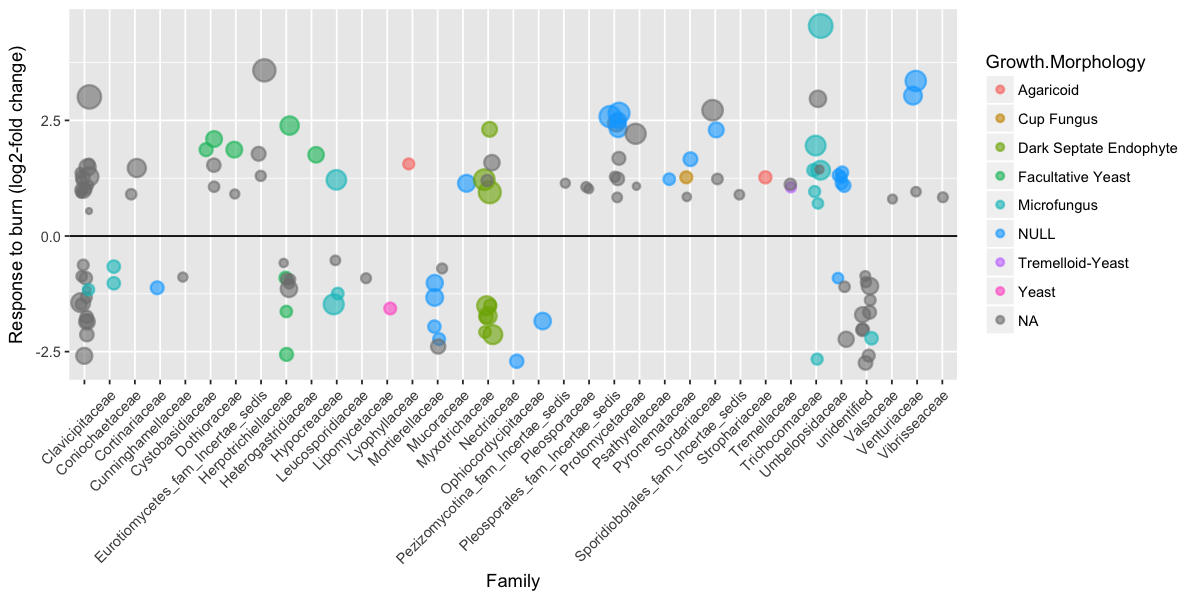

In [151]:
options(repr.plot.width=10, repr.plot.height=5)

df = results%>%
    filter(sigSeverity==1)
SigLevels = levels(droplevels(df$Growth.Morphology))
df = df %>%
    filter(Growth.Morphology %in% SigLevels | is.na(Growth.Morphology))

p = ggplot(df,aes(x=Family, y=logFC, color=Growth.Morphology,fill=Growth.Morphology))
p = p + geom_jitter(shape=21, stroke=1, aes(size=AveExpr), width=0.2, alpha=0.6)
p = p + theme(axis.text.x = element_text(angle=45, hjust=1))
#p = p + facet_wrap(scales="free")
p = p + theme(legend.position="right")
p = p + guides(size=FALSE)
#p = p + scale_color_manual(guide=guide_legend(ncol = 3))
p = p + geom_hline(yintercept=0) 
p = p + ylab("Response to burn (log2-fold change)")
p

In [295]:
PosOTUs = df$OTU[df$logFC>0]
NegOTUs = df$OTU[df$logFC<0]

In [296]:
OTUs = df$OTU
#saveRDS(OTUs,"CHTC/Dada2_Results_OA20_PEAR/CBI-resp-OTUs.rds")
saveRDS(PosOTUs,"CHTC/Dada2_Results_OA20_PEAR/CBI-resp-PosOTUs.rds")
saveRDS(NegOTUs,"CHTC/Dada2_Results_OA20_PEAR/CBI-resp-NegOTUs.rds")

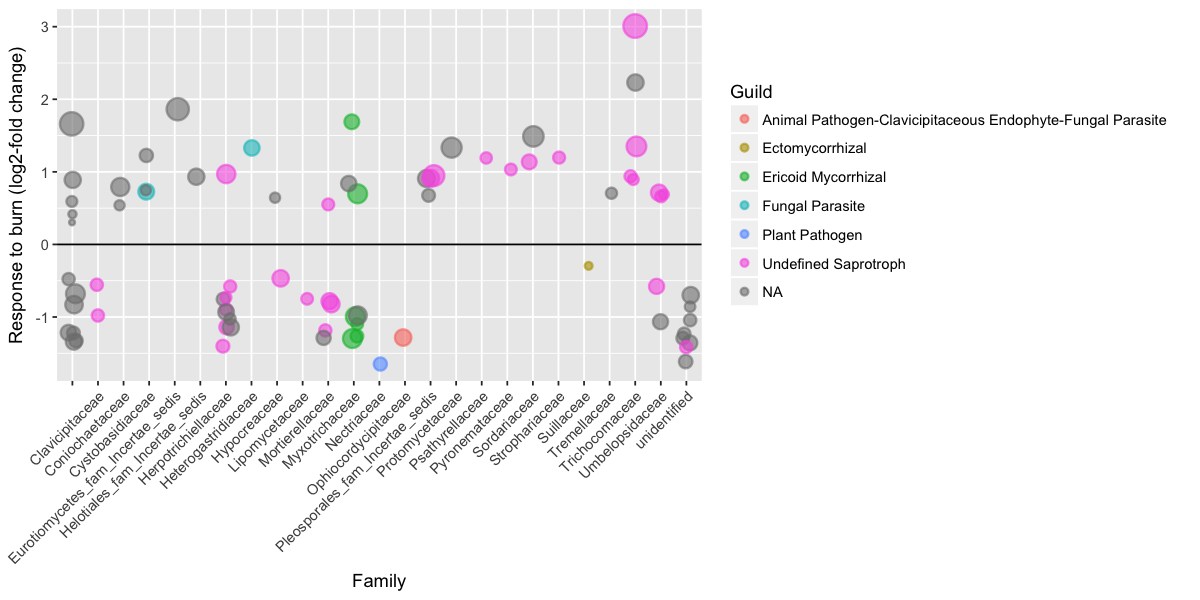

In [280]:
options(repr.plot.width=10, repr.plot.height=5)

df = results%>%
    filter(sigSeverity==1)
SigLevels = levels(droplevels(df$Guild))
df = df %>%
    filter(Guild %in% SigLevels | is.na(Guild))

p = ggplot(df,aes(x=Family, y=logFC, color=Guild,fill=Guild))
p = p + geom_jitter(shape=21, stroke=1, aes(size=AveExpr), width=0.2, alpha=0.6)
p = p + theme(axis.text.x = element_text(angle=45, hjust=1))
#p = p + facet_wrap(scales="free")
p = p + theme(legend.position="right")
p = p + guides(size=FALSE)
#p = p + scale_color_manual(guide=guide_legend(ncol = 3))
p = p + geom_hline(yintercept=0) 
p = p + ylab("Response to burn (log2-fold change)")
p

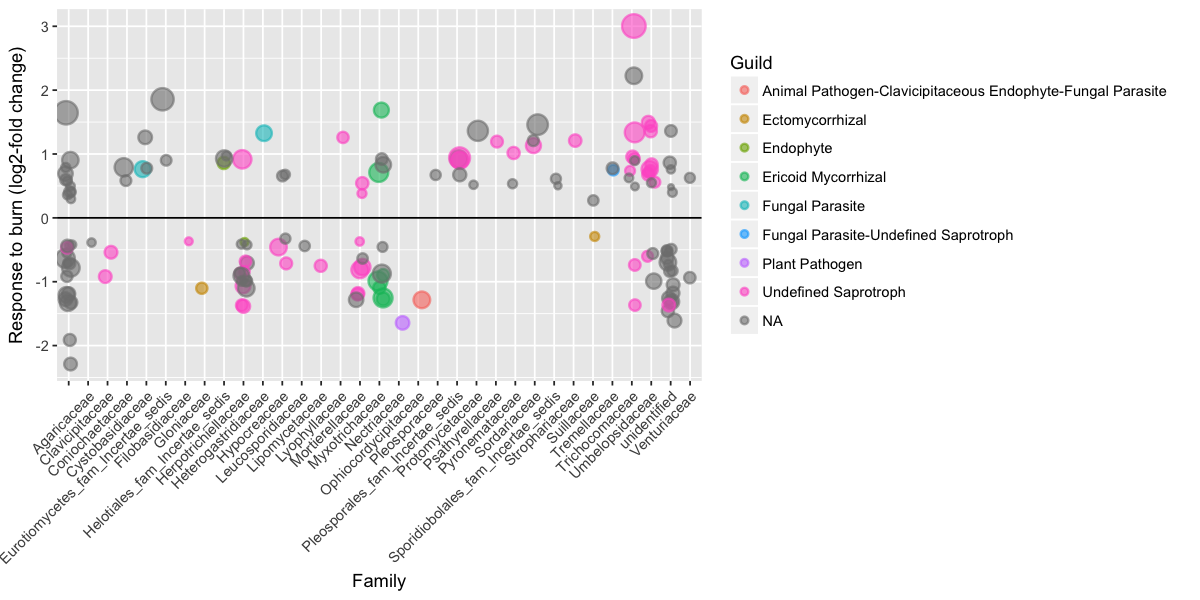

In [141]:
options(repr.plot.width=10, repr.plot.height=5)

df = results%>%
    filter(sigSeverity==1)
SigLevels = levels(droplevels(df$Guild))
df = df %>%
    filter(Guild %in% SigLevels | is.na(Guild))

p = ggplot(df,aes(x=Family, y=logFC, color=Guild,fill=Guild))
p = p + geom_jitter(shape=21, stroke=1, aes(size=AveExpr), width=0.2, alpha=0.6)
p = p + theme(axis.text.x = element_text(angle=45, hjust=1))
#p = p + facet_wrap(scales="free")
p = p + theme(legend.position="right")
p = p + guides(size=FALSE)
#p = p + scale_color_manual(guide=guide_legend(ncol = 3))
p = p + geom_hline(yintercept=0) 
p = p + ylab("Response to burn (log2-fold change)")
p

In [148]:
results[results$Family=="Gloniaceae",]
# https://www.nature.com/articles/ncomms12662
# "Cenococcum geophilum, the only mycorrhizal species within the largest fungal class Dothideomycetes, a class known for devastating plant pathogens."
# "The frequency with which this symbiont is found on tree roots and its possible role in water and nutrient transport in symbiosis calls for further studies on mechanisms of host and environmental adaptation."

[1] 17 25